## 클러스터링 분석
- 클러스터링 분석이란?
- 데이터간 유사도
- 주요 클러스터링 기법
- 클러스터간 거리 측정
-------------------------------------------------------------------------------

- 클러스터링 분석이란?
    - 주어진 데이터의 특성을 고려하여 데이터 군집을 형성하여 데이터를 분석하는 기법
    - 각 클러스터는 비슷한 특성을 가진 데이터를 포함함.  
    ![](./img/cluster_img.PNG)
    

- 데이터간 유사도 정의  
    - 데이터 간 거리(Distance metrics)가 데이터 간 유사도를 나타내는 척도로 널리 사용됨 
    <p float="center">
    <img src = "./img/cluster.PNG" width = "50%" height = "100%"/>
    <img src = "./img/cluster2.PNG" width = "50%" height = "100%"/>
    </p>
- 주요 클러스터링 기법
![](./img/cluster3.PNG)

--------------------------------------------------------------------------------
### - Partitioning approach : K-means Algorithm
- 알고리즘 설명  
: Partitioning 기반의 Clustering 알고리즘  
: 총 3단계로 구성되며 주로 마지막 두 단계가 반복 수행됨
: 알고리즘 과정  
    - Setp1. Centroids 초기화
    - Setp2. 오브젝트들을 가장 가까운 Centroid의 클러스터로 지정
    - Setp3. 각 클러스터의 새로운 Centroid를 계산
    - Setp4. Centroid가 수렴할 때까지 반복  
    
- 실습  
: LEGACY!!! 😡이므로 생략하도록 하겠음.(DBSCAN에 집중할 것)
--------------------------------------------------------------------------------


    
    


### - DBSCAN Algorithm (⭐과제 ⭐)
- 알고리즘 설명
- Scikit-learn을 활용한 실습
- 과제 소개  
--------------------------------------------------------------------------------

- 알고리즘 설명  
: Density 기반의 clustering 알고리즘
: 알고리즘을 설명하기위해 다음 5가지 용어를 정의함  
    - Core, Eps, Noise, MinPts, Border  
    ![](./img/cluster3.PNG)
    
    

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
"land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", 
"num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", 
"is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", 
"rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", 
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count", "dst_host_same_srv_rate", 
"dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
"dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
"dst_host_srv_rerror_rate", "label"]

In [3]:
with open('./datasets/kddcupdata/kddcup.data_10_percent_corrected', 'r') as file:
    data = pd.read_csv(file, names=col_names)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [4]:
data['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [5]:
unique_labels = data['label'].unique()
unique_labels

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [6]:
selected_data = pd.DataFrame()
selected_data


""


In [7]:
selected_data = pd.concat([selected_data, data.loc[data['label'] == 'normal.'][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,tcp,http,SF,232,1721,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
196,0,tcp,http,SF,246,1718,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
197,0,tcp,http,SF,218,1484,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
198,0,tcp,http,SF,222,1651,0,0,0,0,...,255,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
for label in unique_labels:
    selected_data = pd.concat([selected_data, data.loc[data['label'] == label][:200]])
selected_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00,rootkit.
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25,rootkit.
397011,0,udp,other,SF,32,0,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00,rootkit.
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00,rootkit.


In [9]:
labels = selected_data['label'].to_numpy()  # 데이터와 레이블 분리(=copy와 유사)
labels

array(['normal.', 'normal.', 'normal.', ..., 'rootkit.', 'rootkit.',
       'rootkit.'], dtype=object)

In [10]:
data = selected_data.drop('label', axis=1)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,tcp,ftp_data,SF,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,tcp,telnet,SF,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,udp,other,SF,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,udp,other,SF,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [11]:
data['protocol_type'], _ = data['protocol_type'].factorize()
data['service'], _ = data['service'].factorize()
data['flag'], _ = data['flag'].factorize()

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,0,0,181,5450,0,0,0,0,...,9,9,1.00,0.00,0.11,0.0,0.0,0.00,0.00,0.00
1,0,0,0,0,239,486,0,0,0,0,...,19,19,1.00,0.00,0.05,0.0,0.0,0.00,0.00,0.00
2,0,0,0,0,235,1337,0,0,0,0,...,29,29,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
3,0,0,0,0,219,1337,0,0,0,0,...,39,39,1.00,0.00,0.03,0.0,0.0,0.00,0.00,0.00
4,0,0,0,0,217,2032,0,0,0,0,...,49,49,1.00,0.00,0.02,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142477,0,0,2,0,0,5636,0,0,0,0,...,1,41,1.00,0.00,1.00,0.1,0.0,0.00,0.00,0.00
148154,61,0,1,0,294,3929,0,0,0,0,...,255,4,0.02,0.02,0.00,0.0,0.0,0.25,0.73,0.25
397011,0,2,17,0,32,0,0,0,0,0,...,255,1,0.00,0.02,0.00,0.0,0.0,0.00,0.00,0.00
452001,0,2,17,0,4,4,0,0,0,0,...,1,1,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.00


In [12]:
scaler = MinMaxScaler()   # 일정하지 않은 데이터 개수를 조정해줌.
data = scaler.fit_transform(data)

In [13]:
data[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61041764e-07, 1.05713002e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37254902e-02, 1.37254902e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14960630e-02,
       3.14960630e-02, 1.00000000e+00, 0.00000000e+00, 1.10000000e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [50]:
 data = PCA(n_components=5).fit_transform(data)

In [51]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]  # 색에 대한 레이블링 노가다 하기 싫어서 만든 코드

In [16]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [17]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [18]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

In [19]:
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(unique_labels))]

In [20]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7126489811610919, 0.10711264898116109, 0.28081507112648985, 1.0),
 (0.8141484044598232, 0.2196847366397539, 0.3048058439061899, 1.0),
 (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035, 1.0),
 (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776, 1.0),
 (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287, 1.0),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863, 1.0),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996, 1.0),
 (0.9096501345636295, 0.9638600538254518, 0.6080738177623992, 1.0),
 (0.8202998846597465, 0.9275663206459055, 

In [21]:
def gen_color_dict(_unique_labels, _colors):
    color_dict = dict()
    for i in range(len(_unique_labels)):
        color_dict[_unique_labels[i]] = _colors[i]
    return color_dict

In [22]:
gt_color_dict = gen_color_dict(unique_labels, colors)

In [23]:
gt_color_dict

{'normal.': (0.6196078431372549,
  0.00392156862745098,
  0.25882352941176473,
  1.0),
 'buffer_overflow.': (0.7126489811610919,
  0.10711264898116109,
  0.28081507112648985,
  1.0),
 'loadmodule.': (0.8141484044598232,
  0.2196847366397539,
  0.3048058439061899,
  1.0),
 'perl.': (0.8758169934640523, 0.3045751633986928, 0.29411764705882354, 1.0),
 'neptune.': (0.9330257593233372,
  0.3913110342176086,
  0.27197231833910035,
  1.0),
 'smurf.': (0.9665513264129182, 0.49742406766628217, 0.295040369088812, 1.0),
 'guess_passwd.': (0.9817762399077278,
  0.6073817762399076,
  0.3457900807381776,
  1.0),
 'pod.': (0.9928489042675894, 0.716955017301038, 0.40945790080738165, 1.0),
 'teardrop.': (0.9946943483275663,
  0.8092272202998846,
  0.48696655132641287,
  1.0),
 'portsweep.': (0.9963860053825452,
  0.8879661668589004,
  0.5610918877354863,
  1.0),
 'ipsweep.': (0.9982314494425221, 0.9451749327181853, 0.6570549788542868, 1.0),
 'land.': (0.998077662437524, 0.9992310649750096, 0.7460207612

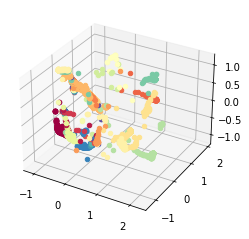

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], c=[gt_color_dict[labels[i]]])
plt.show()

In [52]:
dbscan = DBSCAN(eps=0.1215, min_samples=6)
dbscan.fit(data)

DBSCAN(eps=0.1215, min_samples=6)

In [54]:
dbscan_label = dbscan.labels_
dbscan_unique_labels = list(set(dbscan_label))
colors = [plt.cm.Spectral(e) for e in np.linspace(0, 1, len(dbscan_unique_labels))]
dbscan_color_dict = gen_color_dict(dbscan_unique_labels, colors)

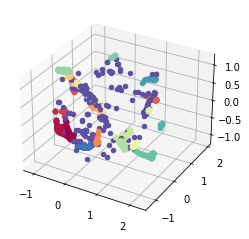

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(data)):
    ax.scatter(data[i][0], data[i][1], data[i][2], 
c=[dbscan_color_dict[dbscan_label[i]]])
plt.show()

In [55]:
n_clusters_ = len(set(dbscan_label)) - (1 if -1 in dbscan_label else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, dbscan_label))    # 동질성 : 각 클러스터의 모든 객체들이 동일한 클래스로부터 온 객체들 일 경우 동질성을 만족시킨다.
print("Completeness: %0.3f" % metrics.completeness_score(labels, dbscan_label))  # 완전성 : 각 클래스의 모든 객체들이 동일한 클러스터의 멤버가 될 때, 클러스터링 결과는 완전성을 만족시킨다.
print("V-measure: %0.3f" % metrics.v_measure_score(labels, dbscan_label))

Estimated number of clusters: 29
Homogeneity: 0.866
Completeness: 0.777
V-measure: 0.819


------------------------------------------------------------------------------------------------------------------------
# N_components, EPS, Min_Sample

#### 1) Min_Sample =1로 하고, N_components와 EPS를 찾기
- v_measure:0.7193051428901487 (n_components:2일때, Eps=0.0136)
- v_measure:0.8133647393409461 (n_components:3일때, Eps=0.0534)
- v_measure:0.8290678795188465 (n_components:4일때, Eps=0.0784)
- v_measure:0.8485325103015419 (n_components:5일때, Eps=0.1215)
- v_measure:0.8430434435904525 (n_components:6일때, Eps=0.1190)
- v_measure:0.8399905844570222 (n_components:7일때, Eps=0.2854)
- v_measure:0.8308202957590556 (n_components:8일때, Eps=0.3071)
- v_measure:0.8299961673402556 (n_components:9일때, Eps=0.3108)
- v_measure:0.8242888731211486 (n_components:10일때, Eps=0.2547)

#### 2) N_components+1 <= Min_Sample <=2*N_components로 하고, Min_Sample, N_components, EPS를 찾기
- v_measure:0.6929957455562502 (n_components:2, minPts = 3, Eps=0.0136)
- v_measure:0.7834162617285118 (n_components:3, minPts = 4, Eps=0.0536)
- v_measure:0.7964053491184901 (n_components:4, minPts = 5, Eps=0.0781)
- v_measure:0.8188204860677882 (n_components:5, minPts = 6, Eps=0.1215)

In [47]:
nc_val = 5          # 차원 지정
max_val = 0
eps_val = 0
sample_val = 0

for sample_i in range(nc_val+1, 2*nc_val+1) :
    print("sample_val = " + str(sample_val))
    for eps_i in range(10,10000):
        print("eps_i = " + str(eps_i))
        eps_ = eps_i/10000
        data = PCA(n_components=nc_val).fit_transform(data)
        dbscan = DBSCAN(eps=eps_, min_samples=sample_i)
        dbscan.fit(data)
        dbscan_label = dbscan.labels_
        vmeasure_i = metrics.v_measure_score(labels, dbscan_label)
        if vmeasure_i > max_val : 
            max_val = vmeasure_i
            eps_val = eps_i
            sample_val = sample_i

print("n_components = " + str(nc_val)) 
print("minPts = " + str(sample_val), "eps = " + str(eps_val)) 
print("v_measure = " + str(max_val))


sample_val = 0
eps_i = 10
eps_i = 11
eps_i = 12
eps_i = 13
eps_i = 14
eps_i = 15
eps_i = 16
eps_i = 17
eps_i = 18
eps_i = 19
eps_i = 20
eps_i = 21
eps_i = 22
eps_i = 23
eps_i = 24
eps_i = 25
eps_i = 26
eps_i = 27
eps_i = 28
eps_i = 29
eps_i = 30
eps_i = 31
eps_i = 32
eps_i = 33
eps_i = 34
eps_i = 35
eps_i = 36
eps_i = 37
eps_i = 38
eps_i = 39
eps_i = 40
eps_i = 41
eps_i = 42
eps_i = 43
eps_i = 44
eps_i = 45
eps_i = 46
eps_i = 47
eps_i = 48
eps_i = 49
eps_i = 50
eps_i = 51
eps_i = 52
eps_i = 53
eps_i = 54
eps_i = 55
eps_i = 56
eps_i = 57
eps_i = 58
eps_i = 59
eps_i = 60
eps_i = 61
eps_i = 62
eps_i = 63
eps_i = 64
eps_i = 65
eps_i = 66
eps_i = 67
eps_i = 68
eps_i = 69
eps_i = 70
eps_i = 71
eps_i = 72
eps_i = 73
eps_i = 74
eps_i = 75
eps_i = 76
eps_i = 77
eps_i = 78
eps_i = 79
eps_i = 80
eps_i = 81
eps_i = 82
eps_i = 83
eps_i = 84
eps_i = 85
eps_i = 86
eps_i = 87
eps_i = 88
eps_i = 89
eps_i = 90
eps_i = 91
eps_i = 92
eps_i = 93
eps_i = 94
eps_i = 95
eps_i = 96
eps_i = 97
eps_i = 98
eps_i 

eps_i = 699
eps_i = 700
eps_i = 701
eps_i = 702
eps_i = 703
eps_i = 704
eps_i = 705
eps_i = 706
eps_i = 707
eps_i = 708
eps_i = 709
eps_i = 710
eps_i = 711
eps_i = 712
eps_i = 713
eps_i = 714
eps_i = 715
eps_i = 716
eps_i = 717
eps_i = 718
eps_i = 719
eps_i = 720
eps_i = 721
eps_i = 722
eps_i = 723
eps_i = 724
eps_i = 725
eps_i = 726
eps_i = 727
eps_i = 728
eps_i = 729
eps_i = 730
eps_i = 731
eps_i = 732
eps_i = 733
eps_i = 734
eps_i = 735
eps_i = 736
eps_i = 737
eps_i = 738
eps_i = 739
eps_i = 740
eps_i = 741
eps_i = 742
eps_i = 743
eps_i = 744
eps_i = 745
eps_i = 746
eps_i = 747
eps_i = 748
eps_i = 749
eps_i = 750
eps_i = 751
eps_i = 752
eps_i = 753
eps_i = 754
eps_i = 755
eps_i = 756
eps_i = 757
eps_i = 758
eps_i = 759
eps_i = 760
eps_i = 761
eps_i = 762
eps_i = 763
eps_i = 764
eps_i = 765
eps_i = 766
eps_i = 767
eps_i = 768
eps_i = 769
eps_i = 770
eps_i = 771
eps_i = 772
eps_i = 773
eps_i = 774
eps_i = 775
eps_i = 776
eps_i = 777
eps_i = 778
eps_i = 779
eps_i = 780
eps_i = 781
eps_

eps_i = 1355
eps_i = 1356
eps_i = 1357
eps_i = 1358
eps_i = 1359
eps_i = 1360
eps_i = 1361
eps_i = 1362
eps_i = 1363
eps_i = 1364
eps_i = 1365
eps_i = 1366
eps_i = 1367
eps_i = 1368
eps_i = 1369
eps_i = 1370
eps_i = 1371
eps_i = 1372
eps_i = 1373
eps_i = 1374
eps_i = 1375
eps_i = 1376
eps_i = 1377
eps_i = 1378
eps_i = 1379
eps_i = 1380
eps_i = 1381
eps_i = 1382
eps_i = 1383
eps_i = 1384
eps_i = 1385
eps_i = 1386
eps_i = 1387
eps_i = 1388
eps_i = 1389
eps_i = 1390
eps_i = 1391
eps_i = 1392
eps_i = 1393
eps_i = 1394
eps_i = 1395
eps_i = 1396
eps_i = 1397
eps_i = 1398
eps_i = 1399
eps_i = 1400
eps_i = 1401
eps_i = 1402
eps_i = 1403
eps_i = 1404
eps_i = 1405
eps_i = 1406
eps_i = 1407
eps_i = 1408
eps_i = 1409
eps_i = 1410
eps_i = 1411
eps_i = 1412
eps_i = 1413
eps_i = 1414
eps_i = 1415
eps_i = 1416
eps_i = 1417
eps_i = 1418
eps_i = 1419
eps_i = 1420
eps_i = 1421
eps_i = 1422
eps_i = 1423
eps_i = 1424
eps_i = 1425
eps_i = 1426
eps_i = 1427
eps_i = 1428
eps_i = 1429
eps_i = 1430
eps_i = 1431

eps_i = 1990
eps_i = 1991
eps_i = 1992
eps_i = 1993
eps_i = 1994
eps_i = 1995
eps_i = 1996
eps_i = 1997
eps_i = 1998
eps_i = 1999
eps_i = 2000
eps_i = 2001
eps_i = 2002
eps_i = 2003
eps_i = 2004
eps_i = 2005
eps_i = 2006
eps_i = 2007
eps_i = 2008
eps_i = 2009
eps_i = 2010
eps_i = 2011
eps_i = 2012
eps_i = 2013
eps_i = 2014
eps_i = 2015
eps_i = 2016
eps_i = 2017
eps_i = 2018
eps_i = 2019
eps_i = 2020
eps_i = 2021
eps_i = 2022
eps_i = 2023
eps_i = 2024
eps_i = 2025
eps_i = 2026
eps_i = 2027
eps_i = 2028
eps_i = 2029
eps_i = 2030
eps_i = 2031
eps_i = 2032
eps_i = 2033
eps_i = 2034
eps_i = 2035
eps_i = 2036
eps_i = 2037
eps_i = 2038
eps_i = 2039
eps_i = 2040
eps_i = 2041
eps_i = 2042
eps_i = 2043
eps_i = 2044
eps_i = 2045
eps_i = 2046
eps_i = 2047
eps_i = 2048
eps_i = 2049
eps_i = 2050
eps_i = 2051
eps_i = 2052
eps_i = 2053
eps_i = 2054
eps_i = 2055
eps_i = 2056
eps_i = 2057
eps_i = 2058
eps_i = 2059
eps_i = 2060
eps_i = 2061
eps_i = 2062
eps_i = 2063
eps_i = 2064
eps_i = 2065
eps_i = 2066

eps_i = 2623
eps_i = 2624
eps_i = 2625
eps_i = 2626
eps_i = 2627
eps_i = 2628
eps_i = 2629
eps_i = 2630
eps_i = 2631
eps_i = 2632
eps_i = 2633
eps_i = 2634
eps_i = 2635
eps_i = 2636
eps_i = 2637
eps_i = 2638
eps_i = 2639
eps_i = 2640
eps_i = 2641
eps_i = 2642
eps_i = 2643
eps_i = 2644
eps_i = 2645
eps_i = 2646
eps_i = 2647
eps_i = 2648
eps_i = 2649
eps_i = 2650
eps_i = 2651
eps_i = 2652
eps_i = 2653
eps_i = 2654
eps_i = 2655
eps_i = 2656
eps_i = 2657
eps_i = 2658
eps_i = 2659
eps_i = 2660
eps_i = 2661
eps_i = 2662
eps_i = 2663
eps_i = 2664
eps_i = 2665
eps_i = 2666
eps_i = 2667
eps_i = 2668
eps_i = 2669
eps_i = 2670
eps_i = 2671
eps_i = 2672
eps_i = 2673
eps_i = 2674
eps_i = 2675
eps_i = 2676
eps_i = 2677
eps_i = 2678
eps_i = 2679
eps_i = 2680
eps_i = 2681
eps_i = 2682
eps_i = 2683
eps_i = 2684
eps_i = 2685
eps_i = 2686
eps_i = 2687
eps_i = 2688
eps_i = 2689
eps_i = 2690
eps_i = 2691
eps_i = 2692
eps_i = 2693
eps_i = 2694
eps_i = 2695
eps_i = 2696
eps_i = 2697
eps_i = 2698
eps_i = 2699

eps_i = 3254
eps_i = 3255
eps_i = 3256
eps_i = 3257
eps_i = 3258
eps_i = 3259
eps_i = 3260
eps_i = 3261
eps_i = 3262
eps_i = 3263
eps_i = 3264
eps_i = 3265
eps_i = 3266
eps_i = 3267
eps_i = 3268
eps_i = 3269
eps_i = 3270
eps_i = 3271
eps_i = 3272
eps_i = 3273
eps_i = 3274
eps_i = 3275
eps_i = 3276
eps_i = 3277
eps_i = 3278
eps_i = 3279
eps_i = 3280
eps_i = 3281
eps_i = 3282
eps_i = 3283
eps_i = 3284
eps_i = 3285
eps_i = 3286
eps_i = 3287
eps_i = 3288
eps_i = 3289
eps_i = 3290
eps_i = 3291
eps_i = 3292
eps_i = 3293
eps_i = 3294
eps_i = 3295
eps_i = 3296
eps_i = 3297
eps_i = 3298
eps_i = 3299
eps_i = 3300
eps_i = 3301
eps_i = 3302
eps_i = 3303
eps_i = 3304
eps_i = 3305
eps_i = 3306
eps_i = 3307
eps_i = 3308
eps_i = 3309
eps_i = 3310
eps_i = 3311
eps_i = 3312
eps_i = 3313
eps_i = 3314
eps_i = 3315
eps_i = 3316
eps_i = 3317
eps_i = 3318
eps_i = 3319
eps_i = 3320
eps_i = 3321
eps_i = 3322
eps_i = 3323
eps_i = 3324
eps_i = 3325
eps_i = 3326
eps_i = 3327
eps_i = 3328
eps_i = 3329
eps_i = 3330

eps_i = 3887
eps_i = 3888
eps_i = 3889
eps_i = 3890
eps_i = 3891
eps_i = 3892
eps_i = 3893
eps_i = 3894
eps_i = 3895
eps_i = 3896
eps_i = 3897
eps_i = 3898
eps_i = 3899
eps_i = 3900
eps_i = 3901
eps_i = 3902
eps_i = 3903
eps_i = 3904
eps_i = 3905
eps_i = 3906
eps_i = 3907
eps_i = 3908
eps_i = 3909
eps_i = 3910
eps_i = 3911
eps_i = 3912
eps_i = 3913
eps_i = 3914
eps_i = 3915
eps_i = 3916
eps_i = 3917
eps_i = 3918
eps_i = 3919
eps_i = 3920
eps_i = 3921
eps_i = 3922
eps_i = 3923
eps_i = 3924
eps_i = 3925
eps_i = 3926
eps_i = 3927
eps_i = 3928
eps_i = 3929
eps_i = 3930
eps_i = 3931
eps_i = 3932
eps_i = 3933
eps_i = 3934
eps_i = 3935
eps_i = 3936
eps_i = 3937
eps_i = 3938
eps_i = 3939
eps_i = 3940
eps_i = 3941
eps_i = 3942
eps_i = 3943
eps_i = 3944
eps_i = 3945
eps_i = 3946
eps_i = 3947
eps_i = 3948
eps_i = 3949
eps_i = 3950
eps_i = 3951
eps_i = 3952
eps_i = 3953
eps_i = 3954
eps_i = 3955
eps_i = 3956
eps_i = 3957
eps_i = 3958
eps_i = 3959
eps_i = 3960
eps_i = 3961
eps_i = 3962
eps_i = 3963

eps_i = 4519
eps_i = 4520
eps_i = 4521
eps_i = 4522
eps_i = 4523
eps_i = 4524
eps_i = 4525
eps_i = 4526
eps_i = 4527
eps_i = 4528
eps_i = 4529
eps_i = 4530
eps_i = 4531
eps_i = 4532
eps_i = 4533
eps_i = 4534
eps_i = 4535
eps_i = 4536
eps_i = 4537
eps_i = 4538
eps_i = 4539
eps_i = 4540
eps_i = 4541
eps_i = 4542
eps_i = 4543
eps_i = 4544
eps_i = 4545
eps_i = 4546
eps_i = 4547
eps_i = 4548
eps_i = 4549
eps_i = 4550
eps_i = 4551
eps_i = 4552
eps_i = 4553
eps_i = 4554
eps_i = 4555
eps_i = 4556
eps_i = 4557
eps_i = 4558
eps_i = 4559
eps_i = 4560
eps_i = 4561
eps_i = 4562
eps_i = 4563
eps_i = 4564
eps_i = 4565
eps_i = 4566
eps_i = 4567
eps_i = 4568
eps_i = 4569
eps_i = 4570
eps_i = 4571
eps_i = 4572
eps_i = 4573
eps_i = 4574
eps_i = 4575
eps_i = 4576
eps_i = 4577
eps_i = 4578
eps_i = 4579
eps_i = 4580
eps_i = 4581
eps_i = 4582
eps_i = 4583
eps_i = 4584
eps_i = 4585
eps_i = 4586
eps_i = 4587
eps_i = 4588
eps_i = 4589
eps_i = 4590
eps_i = 4591
eps_i = 4592
eps_i = 4593
eps_i = 4594
eps_i = 4595

eps_i = 5151
eps_i = 5152
eps_i = 5153
eps_i = 5154
eps_i = 5155
eps_i = 5156
eps_i = 5157
eps_i = 5158
eps_i = 5159
eps_i = 5160
eps_i = 5161
eps_i = 5162
eps_i = 5163
eps_i = 5164
eps_i = 5165
eps_i = 5166
eps_i = 5167
eps_i = 5168
eps_i = 5169
eps_i = 5170
eps_i = 5171
eps_i = 5172
eps_i = 5173
eps_i = 5174
eps_i = 5175
eps_i = 5176
eps_i = 5177
eps_i = 5178
eps_i = 5179
eps_i = 5180
eps_i = 5181
eps_i = 5182
eps_i = 5183
eps_i = 5184
eps_i = 5185
eps_i = 5186
eps_i = 5187
eps_i = 5188
eps_i = 5189
eps_i = 5190
eps_i = 5191
eps_i = 5192
eps_i = 5193
eps_i = 5194
eps_i = 5195
eps_i = 5196
eps_i = 5197
eps_i = 5198
eps_i = 5199
eps_i = 5200
eps_i = 5201
eps_i = 5202
eps_i = 5203
eps_i = 5204
eps_i = 5205
eps_i = 5206
eps_i = 5207
eps_i = 5208
eps_i = 5209
eps_i = 5210
eps_i = 5211
eps_i = 5212
eps_i = 5213
eps_i = 5214
eps_i = 5215
eps_i = 5216
eps_i = 5217
eps_i = 5218
eps_i = 5219
eps_i = 5220
eps_i = 5221
eps_i = 5222
eps_i = 5223
eps_i = 5224
eps_i = 5225
eps_i = 5226
eps_i = 5227

eps_i = 5783
eps_i = 5784
eps_i = 5785
eps_i = 5786
eps_i = 5787
eps_i = 5788
eps_i = 5789
eps_i = 5790
eps_i = 5791
eps_i = 5792
eps_i = 5793
eps_i = 5794
eps_i = 5795
eps_i = 5796
eps_i = 5797
eps_i = 5798
eps_i = 5799
eps_i = 5800
eps_i = 5801
eps_i = 5802
eps_i = 5803
eps_i = 5804
eps_i = 5805
eps_i = 5806
eps_i = 5807
eps_i = 5808
eps_i = 5809
eps_i = 5810
eps_i = 5811
eps_i = 5812
eps_i = 5813
eps_i = 5814
eps_i = 5815
eps_i = 5816
eps_i = 5817
eps_i = 5818
eps_i = 5819
eps_i = 5820
eps_i = 5821
eps_i = 5822
eps_i = 5823
eps_i = 5824
eps_i = 5825
eps_i = 5826
eps_i = 5827
eps_i = 5828
eps_i = 5829
eps_i = 5830
eps_i = 5831
eps_i = 5832
eps_i = 5833
eps_i = 5834
eps_i = 5835
eps_i = 5836
eps_i = 5837
eps_i = 5838
eps_i = 5839
eps_i = 5840
eps_i = 5841
eps_i = 5842
eps_i = 5843
eps_i = 5844
eps_i = 5845
eps_i = 5846
eps_i = 5847
eps_i = 5848
eps_i = 5849
eps_i = 5850
eps_i = 5851
eps_i = 5852
eps_i = 5853
eps_i = 5854
eps_i = 5855
eps_i = 5856
eps_i = 5857
eps_i = 5858
eps_i = 5859

eps_i = 6415
eps_i = 6416
eps_i = 6417
eps_i = 6418
eps_i = 6419
eps_i = 6420
eps_i = 6421
eps_i = 6422
eps_i = 6423
eps_i = 6424
eps_i = 6425
eps_i = 6426
eps_i = 6427
eps_i = 6428
eps_i = 6429
eps_i = 6430
eps_i = 6431
eps_i = 6432
eps_i = 6433
eps_i = 6434
eps_i = 6435
eps_i = 6436
eps_i = 6437
eps_i = 6438
eps_i = 6439
eps_i = 6440
eps_i = 6441
eps_i = 6442
eps_i = 6443
eps_i = 6444
eps_i = 6445
eps_i = 6446
eps_i = 6447
eps_i = 6448
eps_i = 6449
eps_i = 6450
eps_i = 6451
eps_i = 6452
eps_i = 6453
eps_i = 6454
eps_i = 6455
eps_i = 6456
eps_i = 6457
eps_i = 6458
eps_i = 6459
eps_i = 6460
eps_i = 6461
eps_i = 6462
eps_i = 6463
eps_i = 6464
eps_i = 6465
eps_i = 6466
eps_i = 6467
eps_i = 6468
eps_i = 6469
eps_i = 6470
eps_i = 6471
eps_i = 6472
eps_i = 6473
eps_i = 6474
eps_i = 6475
eps_i = 6476
eps_i = 6477
eps_i = 6478
eps_i = 6479
eps_i = 6480
eps_i = 6481
eps_i = 6482
eps_i = 6483
eps_i = 6484
eps_i = 6485
eps_i = 6486
eps_i = 6487
eps_i = 6488
eps_i = 6489
eps_i = 6490
eps_i = 6491

eps_i = 7047
eps_i = 7048
eps_i = 7049
eps_i = 7050
eps_i = 7051
eps_i = 7052
eps_i = 7053
eps_i = 7054
eps_i = 7055
eps_i = 7056
eps_i = 7057
eps_i = 7058
eps_i = 7059
eps_i = 7060
eps_i = 7061
eps_i = 7062
eps_i = 7063
eps_i = 7064
eps_i = 7065
eps_i = 7066
eps_i = 7067
eps_i = 7068
eps_i = 7069
eps_i = 7070
eps_i = 7071
eps_i = 7072
eps_i = 7073
eps_i = 7074
eps_i = 7075
eps_i = 7076
eps_i = 7077
eps_i = 7078
eps_i = 7079
eps_i = 7080
eps_i = 7081
eps_i = 7082
eps_i = 7083
eps_i = 7084
eps_i = 7085
eps_i = 7086
eps_i = 7087
eps_i = 7088
eps_i = 7089
eps_i = 7090
eps_i = 7091
eps_i = 7092
eps_i = 7093
eps_i = 7094
eps_i = 7095
eps_i = 7096
eps_i = 7097
eps_i = 7098
eps_i = 7099
eps_i = 7100
eps_i = 7101
eps_i = 7102
eps_i = 7103
eps_i = 7104
eps_i = 7105
eps_i = 7106
eps_i = 7107
eps_i = 7108
eps_i = 7109
eps_i = 7110
eps_i = 7111
eps_i = 7112
eps_i = 7113
eps_i = 7114
eps_i = 7115
eps_i = 7116
eps_i = 7117
eps_i = 7118
eps_i = 7119
eps_i = 7120
eps_i = 7121
eps_i = 7122
eps_i = 7123

eps_i = 7679
eps_i = 7680
eps_i = 7681
eps_i = 7682
eps_i = 7683
eps_i = 7684
eps_i = 7685
eps_i = 7686
eps_i = 7687
eps_i = 7688
eps_i = 7689
eps_i = 7690
eps_i = 7691
eps_i = 7692
eps_i = 7693
eps_i = 7694
eps_i = 7695
eps_i = 7696
eps_i = 7697
eps_i = 7698
eps_i = 7699
eps_i = 7700
eps_i = 7701
eps_i = 7702
eps_i = 7703
eps_i = 7704
eps_i = 7705
eps_i = 7706
eps_i = 7707
eps_i = 7708
eps_i = 7709
eps_i = 7710
eps_i = 7711
eps_i = 7712
eps_i = 7713
eps_i = 7714
eps_i = 7715
eps_i = 7716
eps_i = 7717
eps_i = 7718
eps_i = 7719
eps_i = 7720
eps_i = 7721
eps_i = 7722
eps_i = 7723
eps_i = 7724
eps_i = 7725
eps_i = 7726
eps_i = 7727
eps_i = 7728
eps_i = 7729
eps_i = 7730
eps_i = 7731
eps_i = 7732
eps_i = 7733
eps_i = 7734
eps_i = 7735
eps_i = 7736
eps_i = 7737
eps_i = 7738
eps_i = 7739
eps_i = 7740
eps_i = 7741
eps_i = 7742
eps_i = 7743
eps_i = 7744
eps_i = 7745
eps_i = 7746
eps_i = 7747
eps_i = 7748
eps_i = 7749
eps_i = 7750
eps_i = 7751
eps_i = 7752
eps_i = 7753
eps_i = 7754
eps_i = 7755

eps_i = 8311
eps_i = 8312
eps_i = 8313
eps_i = 8314
eps_i = 8315
eps_i = 8316
eps_i = 8317
eps_i = 8318
eps_i = 8319
eps_i = 8320
eps_i = 8321
eps_i = 8322
eps_i = 8323
eps_i = 8324
eps_i = 8325
eps_i = 8326
eps_i = 8327
eps_i = 8328
eps_i = 8329
eps_i = 8330
eps_i = 8331
eps_i = 8332
eps_i = 8333
eps_i = 8334
eps_i = 8335
eps_i = 8336
eps_i = 8337
eps_i = 8338
eps_i = 8339
eps_i = 8340
eps_i = 8341
eps_i = 8342
eps_i = 8343
eps_i = 8344
eps_i = 8345
eps_i = 8346
eps_i = 8347
eps_i = 8348
eps_i = 8349
eps_i = 8350
eps_i = 8351
eps_i = 8352
eps_i = 8353
eps_i = 8354
eps_i = 8355
eps_i = 8356
eps_i = 8357
eps_i = 8358
eps_i = 8359
eps_i = 8360
eps_i = 8361
eps_i = 8362
eps_i = 8363
eps_i = 8364
eps_i = 8365
eps_i = 8366
eps_i = 8367
eps_i = 8368
eps_i = 8369
eps_i = 8370
eps_i = 8371
eps_i = 8372
eps_i = 8373
eps_i = 8374
eps_i = 8375
eps_i = 8376
eps_i = 8377
eps_i = 8378
eps_i = 8379
eps_i = 8380
eps_i = 8381
eps_i = 8382
eps_i = 8383
eps_i = 8384
eps_i = 8385
eps_i = 8386
eps_i = 8387

eps_i = 8943
eps_i = 8944
eps_i = 8945
eps_i = 8946
eps_i = 8947
eps_i = 8948
eps_i = 8949
eps_i = 8950
eps_i = 8951
eps_i = 8952
eps_i = 8953
eps_i = 8954
eps_i = 8955
eps_i = 8956
eps_i = 8957
eps_i = 8958
eps_i = 8959
eps_i = 8960
eps_i = 8961
eps_i = 8962
eps_i = 8963
eps_i = 8964
eps_i = 8965
eps_i = 8966
eps_i = 8967
eps_i = 8968
eps_i = 8969
eps_i = 8970
eps_i = 8971
eps_i = 8972
eps_i = 8973
eps_i = 8974
eps_i = 8975
eps_i = 8976
eps_i = 8977
eps_i = 8978
eps_i = 8979
eps_i = 8980
eps_i = 8981
eps_i = 8982
eps_i = 8983
eps_i = 8984
eps_i = 8985
eps_i = 8986
eps_i = 8987
eps_i = 8988
eps_i = 8989
eps_i = 8990
eps_i = 8991
eps_i = 8992
eps_i = 8993
eps_i = 8994
eps_i = 8995
eps_i = 8996
eps_i = 8997
eps_i = 8998
eps_i = 8999
eps_i = 9000
eps_i = 9001
eps_i = 9002
eps_i = 9003
eps_i = 9004
eps_i = 9005
eps_i = 9006
eps_i = 9007
eps_i = 9008
eps_i = 9009
eps_i = 9010
eps_i = 9011
eps_i = 9012
eps_i = 9013
eps_i = 9014
eps_i = 9015
eps_i = 9016
eps_i = 9017
eps_i = 9018
eps_i = 9019

eps_i = 9575
eps_i = 9576
eps_i = 9577
eps_i = 9578
eps_i = 9579
eps_i = 9580
eps_i = 9581
eps_i = 9582
eps_i = 9583
eps_i = 9584
eps_i = 9585
eps_i = 9586
eps_i = 9587
eps_i = 9588
eps_i = 9589
eps_i = 9590
eps_i = 9591
eps_i = 9592
eps_i = 9593
eps_i = 9594
eps_i = 9595
eps_i = 9596
eps_i = 9597
eps_i = 9598
eps_i = 9599
eps_i = 9600
eps_i = 9601
eps_i = 9602
eps_i = 9603
eps_i = 9604
eps_i = 9605
eps_i = 9606
eps_i = 9607
eps_i = 9608
eps_i = 9609
eps_i = 9610
eps_i = 9611
eps_i = 9612
eps_i = 9613
eps_i = 9614
eps_i = 9615
eps_i = 9616
eps_i = 9617
eps_i = 9618
eps_i = 9619
eps_i = 9620
eps_i = 9621
eps_i = 9622
eps_i = 9623
eps_i = 9624
eps_i = 9625
eps_i = 9626
eps_i = 9627
eps_i = 9628
eps_i = 9629
eps_i = 9630
eps_i = 9631
eps_i = 9632
eps_i = 9633
eps_i = 9634
eps_i = 9635
eps_i = 9636
eps_i = 9637
eps_i = 9638
eps_i = 9639
eps_i = 9640
eps_i = 9641
eps_i = 9642
eps_i = 9643
eps_i = 9644
eps_i = 9645
eps_i = 9646
eps_i = 9647
eps_i = 9648
eps_i = 9649
eps_i = 9650
eps_i = 9651

eps_i = 240
eps_i = 241
eps_i = 242
eps_i = 243
eps_i = 244
eps_i = 245
eps_i = 246
eps_i = 247
eps_i = 248
eps_i = 249
eps_i = 250
eps_i = 251
eps_i = 252
eps_i = 253
eps_i = 254
eps_i = 255
eps_i = 256
eps_i = 257
eps_i = 258
eps_i = 259
eps_i = 260
eps_i = 261
eps_i = 262
eps_i = 263
eps_i = 264
eps_i = 265
eps_i = 266
eps_i = 267
eps_i = 268
eps_i = 269
eps_i = 270
eps_i = 271
eps_i = 272
eps_i = 273
eps_i = 274
eps_i = 275
eps_i = 276
eps_i = 277
eps_i = 278
eps_i = 279
eps_i = 280
eps_i = 281
eps_i = 282
eps_i = 283
eps_i = 284
eps_i = 285
eps_i = 286
eps_i = 287
eps_i = 288
eps_i = 289
eps_i = 290
eps_i = 291
eps_i = 292
eps_i = 293
eps_i = 294
eps_i = 295
eps_i = 296
eps_i = 297
eps_i = 298
eps_i = 299
eps_i = 300
eps_i = 301
eps_i = 302
eps_i = 303
eps_i = 304
eps_i = 305
eps_i = 306
eps_i = 307
eps_i = 308
eps_i = 309
eps_i = 310
eps_i = 311
eps_i = 312
eps_i = 313
eps_i = 314
eps_i = 315
eps_i = 316
eps_i = 317
eps_i = 318
eps_i = 319
eps_i = 320
eps_i = 321
eps_i = 322
eps_

eps_i = 926
eps_i = 927
eps_i = 928
eps_i = 929
eps_i = 930
eps_i = 931
eps_i = 932
eps_i = 933
eps_i = 934
eps_i = 935
eps_i = 936
eps_i = 937
eps_i = 938
eps_i = 939
eps_i = 940
eps_i = 941
eps_i = 942
eps_i = 943
eps_i = 944
eps_i = 945
eps_i = 946
eps_i = 947
eps_i = 948
eps_i = 949
eps_i = 950
eps_i = 951
eps_i = 952
eps_i = 953
eps_i = 954
eps_i = 955
eps_i = 956
eps_i = 957
eps_i = 958
eps_i = 959
eps_i = 960
eps_i = 961
eps_i = 962
eps_i = 963
eps_i = 964
eps_i = 965
eps_i = 966
eps_i = 967
eps_i = 968
eps_i = 969
eps_i = 970
eps_i = 971
eps_i = 972
eps_i = 973
eps_i = 974
eps_i = 975
eps_i = 976
eps_i = 977
eps_i = 978
eps_i = 979
eps_i = 980
eps_i = 981
eps_i = 982
eps_i = 983
eps_i = 984
eps_i = 985
eps_i = 986
eps_i = 987
eps_i = 988
eps_i = 989
eps_i = 990
eps_i = 991
eps_i = 992
eps_i = 993
eps_i = 994
eps_i = 995
eps_i = 996
eps_i = 997
eps_i = 998
eps_i = 999
eps_i = 1000
eps_i = 1001
eps_i = 1002
eps_i = 1003
eps_i = 1004
eps_i = 1005
eps_i = 1006
eps_i = 1007
eps_i = 

eps_i = 1563
eps_i = 1564
eps_i = 1565
eps_i = 1566
eps_i = 1567
eps_i = 1568
eps_i = 1569
eps_i = 1570
eps_i = 1571
eps_i = 1572
eps_i = 1573
eps_i = 1574
eps_i = 1575
eps_i = 1576
eps_i = 1577
eps_i = 1578
eps_i = 1579
eps_i = 1580
eps_i = 1581
eps_i = 1582
eps_i = 1583
eps_i = 1584
eps_i = 1585
eps_i = 1586
eps_i = 1587
eps_i = 1588
eps_i = 1589
eps_i = 1590
eps_i = 1591
eps_i = 1592
eps_i = 1593
eps_i = 1594
eps_i = 1595
eps_i = 1596
eps_i = 1597
eps_i = 1598
eps_i = 1599
eps_i = 1600
eps_i = 1601
eps_i = 1602
eps_i = 1603
eps_i = 1604
eps_i = 1605
eps_i = 1606
eps_i = 1607
eps_i = 1608
eps_i = 1609
eps_i = 1610
eps_i = 1611
eps_i = 1612
eps_i = 1613
eps_i = 1614
eps_i = 1615
eps_i = 1616
eps_i = 1617
eps_i = 1618
eps_i = 1619
eps_i = 1620
eps_i = 1621
eps_i = 1622
eps_i = 1623
eps_i = 1624
eps_i = 1625
eps_i = 1626
eps_i = 1627
eps_i = 1628
eps_i = 1629
eps_i = 1630
eps_i = 1631
eps_i = 1632
eps_i = 1633
eps_i = 1634
eps_i = 1635
eps_i = 1636
eps_i = 1637
eps_i = 1638
eps_i = 1639

eps_i = 2195
eps_i = 2196
eps_i = 2197
eps_i = 2198
eps_i = 2199
eps_i = 2200
eps_i = 2201
eps_i = 2202
eps_i = 2203
eps_i = 2204
eps_i = 2205
eps_i = 2206
eps_i = 2207
eps_i = 2208
eps_i = 2209
eps_i = 2210
eps_i = 2211
eps_i = 2212
eps_i = 2213
eps_i = 2214
eps_i = 2215
eps_i = 2216
eps_i = 2217
eps_i = 2218
eps_i = 2219
eps_i = 2220
eps_i = 2221
eps_i = 2222
eps_i = 2223
eps_i = 2224
eps_i = 2225
eps_i = 2226
eps_i = 2227
eps_i = 2228
eps_i = 2229
eps_i = 2230
eps_i = 2231
eps_i = 2232
eps_i = 2233
eps_i = 2234
eps_i = 2235
eps_i = 2236
eps_i = 2237
eps_i = 2238
eps_i = 2239
eps_i = 2240
eps_i = 2241
eps_i = 2242
eps_i = 2243
eps_i = 2244
eps_i = 2245
eps_i = 2246
eps_i = 2247
eps_i = 2248
eps_i = 2249
eps_i = 2250
eps_i = 2251
eps_i = 2252
eps_i = 2253
eps_i = 2254
eps_i = 2255
eps_i = 2256
eps_i = 2257
eps_i = 2258
eps_i = 2259
eps_i = 2260
eps_i = 2261
eps_i = 2262
eps_i = 2263
eps_i = 2264
eps_i = 2265
eps_i = 2266
eps_i = 2267
eps_i = 2268
eps_i = 2269
eps_i = 2270
eps_i = 2271

eps_i = 2827
eps_i = 2828
eps_i = 2829
eps_i = 2830
eps_i = 2831
eps_i = 2832
eps_i = 2833
eps_i = 2834
eps_i = 2835
eps_i = 2836
eps_i = 2837
eps_i = 2838
eps_i = 2839
eps_i = 2840
eps_i = 2841
eps_i = 2842
eps_i = 2843
eps_i = 2844
eps_i = 2845
eps_i = 2846
eps_i = 2847
eps_i = 2848
eps_i = 2849
eps_i = 2850
eps_i = 2851
eps_i = 2852
eps_i = 2853
eps_i = 2854
eps_i = 2855
eps_i = 2856
eps_i = 2857
eps_i = 2858
eps_i = 2859
eps_i = 2860
eps_i = 2861
eps_i = 2862
eps_i = 2863
eps_i = 2864
eps_i = 2865
eps_i = 2866
eps_i = 2867
eps_i = 2868
eps_i = 2869
eps_i = 2870
eps_i = 2871
eps_i = 2872
eps_i = 2873
eps_i = 2874
eps_i = 2875
eps_i = 2876
eps_i = 2877
eps_i = 2878
eps_i = 2879
eps_i = 2880
eps_i = 2881
eps_i = 2882
eps_i = 2883
eps_i = 2884
eps_i = 2885
eps_i = 2886
eps_i = 2887
eps_i = 2888
eps_i = 2889
eps_i = 2890
eps_i = 2891
eps_i = 2892
eps_i = 2893
eps_i = 2894
eps_i = 2895
eps_i = 2896
eps_i = 2897
eps_i = 2898
eps_i = 2899
eps_i = 2900
eps_i = 2901
eps_i = 2902
eps_i = 2903

eps_i = 3458
eps_i = 3459
eps_i = 3460
eps_i = 3461
eps_i = 3462
eps_i = 3463
eps_i = 3464
eps_i = 3465
eps_i = 3466
eps_i = 3467
eps_i = 3468
eps_i = 3469
eps_i = 3470
eps_i = 3471
eps_i = 3472
eps_i = 3473
eps_i = 3474
eps_i = 3475
eps_i = 3476
eps_i = 3477
eps_i = 3478
eps_i = 3479
eps_i = 3480
eps_i = 3481
eps_i = 3482
eps_i = 3483
eps_i = 3484
eps_i = 3485
eps_i = 3486
eps_i = 3487
eps_i = 3488
eps_i = 3489
eps_i = 3490
eps_i = 3491
eps_i = 3492
eps_i = 3493
eps_i = 3494
eps_i = 3495
eps_i = 3496
eps_i = 3497
eps_i = 3498
eps_i = 3499
eps_i = 3500
eps_i = 3501
eps_i = 3502
eps_i = 3503
eps_i = 3504
eps_i = 3505
eps_i = 3506
eps_i = 3507
eps_i = 3508
eps_i = 3509
eps_i = 3510
eps_i = 3511
eps_i = 3512
eps_i = 3513
eps_i = 3514
eps_i = 3515
eps_i = 3516
eps_i = 3517
eps_i = 3518
eps_i = 3519
eps_i = 3520
eps_i = 3521
eps_i = 3522
eps_i = 3523
eps_i = 3524
eps_i = 3525
eps_i = 3526
eps_i = 3527
eps_i = 3528
eps_i = 3529
eps_i = 3530
eps_i = 3531
eps_i = 3532
eps_i = 3533
eps_i = 3534

eps_i = 4089
eps_i = 4090
eps_i = 4091
eps_i = 4092
eps_i = 4093
eps_i = 4094
eps_i = 4095
eps_i = 4096
eps_i = 4097
eps_i = 4098
eps_i = 4099
eps_i = 4100
eps_i = 4101
eps_i = 4102
eps_i = 4103
eps_i = 4104
eps_i = 4105
eps_i = 4106
eps_i = 4107
eps_i = 4108
eps_i = 4109
eps_i = 4110
eps_i = 4111
eps_i = 4112
eps_i = 4113
eps_i = 4114
eps_i = 4115
eps_i = 4116
eps_i = 4117
eps_i = 4118
eps_i = 4119
eps_i = 4120
eps_i = 4121
eps_i = 4122
eps_i = 4123
eps_i = 4124
eps_i = 4125
eps_i = 4126
eps_i = 4127
eps_i = 4128
eps_i = 4129
eps_i = 4130
eps_i = 4131
eps_i = 4132
eps_i = 4133
eps_i = 4134
eps_i = 4135
eps_i = 4136
eps_i = 4137
eps_i = 4138
eps_i = 4139
eps_i = 4140
eps_i = 4141
eps_i = 4142
eps_i = 4143
eps_i = 4144
eps_i = 4145
eps_i = 4146
eps_i = 4147
eps_i = 4148
eps_i = 4149
eps_i = 4150
eps_i = 4151
eps_i = 4152
eps_i = 4153
eps_i = 4154
eps_i = 4155
eps_i = 4156
eps_i = 4157
eps_i = 4158
eps_i = 4159
eps_i = 4160
eps_i = 4161
eps_i = 4162
eps_i = 4163
eps_i = 4164
eps_i = 4165

eps_i = 4721
eps_i = 4722
eps_i = 4723
eps_i = 4724
eps_i = 4725
eps_i = 4726
eps_i = 4727
eps_i = 4728
eps_i = 4729
eps_i = 4730
eps_i = 4731
eps_i = 4732
eps_i = 4733
eps_i = 4734
eps_i = 4735
eps_i = 4736
eps_i = 4737
eps_i = 4738
eps_i = 4739
eps_i = 4740
eps_i = 4741
eps_i = 4742
eps_i = 4743
eps_i = 4744
eps_i = 4745
eps_i = 4746
eps_i = 4747
eps_i = 4748
eps_i = 4749
eps_i = 4750
eps_i = 4751
eps_i = 4752
eps_i = 4753
eps_i = 4754
eps_i = 4755
eps_i = 4756
eps_i = 4757
eps_i = 4758
eps_i = 4759
eps_i = 4760
eps_i = 4761
eps_i = 4762
eps_i = 4763
eps_i = 4764
eps_i = 4765
eps_i = 4766
eps_i = 4767
eps_i = 4768
eps_i = 4769
eps_i = 4770
eps_i = 4771
eps_i = 4772
eps_i = 4773
eps_i = 4774
eps_i = 4775
eps_i = 4776
eps_i = 4777
eps_i = 4778
eps_i = 4779
eps_i = 4780
eps_i = 4781
eps_i = 4782
eps_i = 4783
eps_i = 4784
eps_i = 4785
eps_i = 4786
eps_i = 4787
eps_i = 4788
eps_i = 4789
eps_i = 4790
eps_i = 4791
eps_i = 4792
eps_i = 4793
eps_i = 4794
eps_i = 4795
eps_i = 4796
eps_i = 4797

eps_i = 5353
eps_i = 5354
eps_i = 5355
eps_i = 5356
eps_i = 5357
eps_i = 5358
eps_i = 5359
eps_i = 5360
eps_i = 5361
eps_i = 5362
eps_i = 5363
eps_i = 5364
eps_i = 5365
eps_i = 5366
eps_i = 5367
eps_i = 5368
eps_i = 5369
eps_i = 5370
eps_i = 5371
eps_i = 5372
eps_i = 5373
eps_i = 5374
eps_i = 5375
eps_i = 5376
eps_i = 5377
eps_i = 5378
eps_i = 5379
eps_i = 5380
eps_i = 5381
eps_i = 5382
eps_i = 5383
eps_i = 5384
eps_i = 5385
eps_i = 5386
eps_i = 5387
eps_i = 5388
eps_i = 5389
eps_i = 5390
eps_i = 5391
eps_i = 5392
eps_i = 5393
eps_i = 5394
eps_i = 5395
eps_i = 5396
eps_i = 5397
eps_i = 5398
eps_i = 5399
eps_i = 5400
eps_i = 5401
eps_i = 5402
eps_i = 5403
eps_i = 5404
eps_i = 5405
eps_i = 5406
eps_i = 5407
eps_i = 5408
eps_i = 5409
eps_i = 5410
eps_i = 5411
eps_i = 5412
eps_i = 5413
eps_i = 5414
eps_i = 5415
eps_i = 5416
eps_i = 5417
eps_i = 5418
eps_i = 5419
eps_i = 5420
eps_i = 5421
eps_i = 5422
eps_i = 5423
eps_i = 5424
eps_i = 5425
eps_i = 5426
eps_i = 5427
eps_i = 5428
eps_i = 5429

eps_i = 5984
eps_i = 5985
eps_i = 5986
eps_i = 5987
eps_i = 5988
eps_i = 5989
eps_i = 5990
eps_i = 5991
eps_i = 5992
eps_i = 5993
eps_i = 5994
eps_i = 5995
eps_i = 5996
eps_i = 5997
eps_i = 5998
eps_i = 5999
eps_i = 6000
eps_i = 6001
eps_i = 6002
eps_i = 6003
eps_i = 6004
eps_i = 6005
eps_i = 6006
eps_i = 6007
eps_i = 6008
eps_i = 6009
eps_i = 6010
eps_i = 6011
eps_i = 6012
eps_i = 6013
eps_i = 6014
eps_i = 6015
eps_i = 6016
eps_i = 6017
eps_i = 6018
eps_i = 6019
eps_i = 6020
eps_i = 6021
eps_i = 6022
eps_i = 6023
eps_i = 6024
eps_i = 6025
eps_i = 6026
eps_i = 6027
eps_i = 6028
eps_i = 6029
eps_i = 6030
eps_i = 6031
eps_i = 6032
eps_i = 6033
eps_i = 6034
eps_i = 6035
eps_i = 6036
eps_i = 6037
eps_i = 6038
eps_i = 6039
eps_i = 6040
eps_i = 6041
eps_i = 6042
eps_i = 6043
eps_i = 6044
eps_i = 6045
eps_i = 6046
eps_i = 6047
eps_i = 6048
eps_i = 6049
eps_i = 6050
eps_i = 6051
eps_i = 6052
eps_i = 6053
eps_i = 6054
eps_i = 6055
eps_i = 6056
eps_i = 6057
eps_i = 6058
eps_i = 6059
eps_i = 6060

eps_i = 6615
eps_i = 6616
eps_i = 6617
eps_i = 6618
eps_i = 6619
eps_i = 6620
eps_i = 6621
eps_i = 6622
eps_i = 6623
eps_i = 6624
eps_i = 6625
eps_i = 6626
eps_i = 6627
eps_i = 6628
eps_i = 6629
eps_i = 6630
eps_i = 6631
eps_i = 6632
eps_i = 6633
eps_i = 6634
eps_i = 6635
eps_i = 6636
eps_i = 6637
eps_i = 6638
eps_i = 6639
eps_i = 6640
eps_i = 6641
eps_i = 6642
eps_i = 6643
eps_i = 6644
eps_i = 6645
eps_i = 6646
eps_i = 6647
eps_i = 6648
eps_i = 6649
eps_i = 6650
eps_i = 6651
eps_i = 6652
eps_i = 6653
eps_i = 6654
eps_i = 6655
eps_i = 6656
eps_i = 6657
eps_i = 6658
eps_i = 6659
eps_i = 6660
eps_i = 6661
eps_i = 6662
eps_i = 6663
eps_i = 6664
eps_i = 6665
eps_i = 6666
eps_i = 6667
eps_i = 6668
eps_i = 6669
eps_i = 6670
eps_i = 6671
eps_i = 6672
eps_i = 6673
eps_i = 6674
eps_i = 6675
eps_i = 6676
eps_i = 6677
eps_i = 6678
eps_i = 6679
eps_i = 6680
eps_i = 6681
eps_i = 6682
eps_i = 6683
eps_i = 6684
eps_i = 6685
eps_i = 6686
eps_i = 6687
eps_i = 6688
eps_i = 6689
eps_i = 6690
eps_i = 6691

eps_i = 7246
eps_i = 7247
eps_i = 7248
eps_i = 7249
eps_i = 7250
eps_i = 7251
eps_i = 7252
eps_i = 7253
eps_i = 7254
eps_i = 7255
eps_i = 7256
eps_i = 7257
eps_i = 7258
eps_i = 7259
eps_i = 7260
eps_i = 7261
eps_i = 7262
eps_i = 7263
eps_i = 7264
eps_i = 7265
eps_i = 7266
eps_i = 7267
eps_i = 7268
eps_i = 7269
eps_i = 7270
eps_i = 7271
eps_i = 7272
eps_i = 7273
eps_i = 7274
eps_i = 7275
eps_i = 7276
eps_i = 7277
eps_i = 7278
eps_i = 7279
eps_i = 7280
eps_i = 7281
eps_i = 7282
eps_i = 7283
eps_i = 7284
eps_i = 7285
eps_i = 7286
eps_i = 7287
eps_i = 7288
eps_i = 7289
eps_i = 7290
eps_i = 7291
eps_i = 7292
eps_i = 7293
eps_i = 7294
eps_i = 7295
eps_i = 7296
eps_i = 7297
eps_i = 7298
eps_i = 7299
eps_i = 7300
eps_i = 7301
eps_i = 7302
eps_i = 7303
eps_i = 7304
eps_i = 7305
eps_i = 7306
eps_i = 7307
eps_i = 7308
eps_i = 7309
eps_i = 7310
eps_i = 7311
eps_i = 7312
eps_i = 7313
eps_i = 7314
eps_i = 7315
eps_i = 7316
eps_i = 7317
eps_i = 7318
eps_i = 7319
eps_i = 7320
eps_i = 7321
eps_i = 7322

eps_i = 7877
eps_i = 7878
eps_i = 7879
eps_i = 7880
eps_i = 7881
eps_i = 7882
eps_i = 7883
eps_i = 7884
eps_i = 7885
eps_i = 7886
eps_i = 7887
eps_i = 7888
eps_i = 7889
eps_i = 7890
eps_i = 7891
eps_i = 7892
eps_i = 7893
eps_i = 7894
eps_i = 7895
eps_i = 7896
eps_i = 7897
eps_i = 7898
eps_i = 7899
eps_i = 7900
eps_i = 7901
eps_i = 7902
eps_i = 7903
eps_i = 7904
eps_i = 7905
eps_i = 7906
eps_i = 7907
eps_i = 7908
eps_i = 7909
eps_i = 7910
eps_i = 7911
eps_i = 7912
eps_i = 7913
eps_i = 7914
eps_i = 7915
eps_i = 7916
eps_i = 7917
eps_i = 7918
eps_i = 7919
eps_i = 7920
eps_i = 7921
eps_i = 7922
eps_i = 7923
eps_i = 7924
eps_i = 7925
eps_i = 7926
eps_i = 7927
eps_i = 7928
eps_i = 7929
eps_i = 7930
eps_i = 7931
eps_i = 7932
eps_i = 7933
eps_i = 7934
eps_i = 7935
eps_i = 7936
eps_i = 7937
eps_i = 7938
eps_i = 7939
eps_i = 7940
eps_i = 7941
eps_i = 7942
eps_i = 7943
eps_i = 7944
eps_i = 7945
eps_i = 7946
eps_i = 7947
eps_i = 7948
eps_i = 7949
eps_i = 7950
eps_i = 7951
eps_i = 7952
eps_i = 7953

eps_i = 8509
eps_i = 8510
eps_i = 8511
eps_i = 8512
eps_i = 8513
eps_i = 8514
eps_i = 8515
eps_i = 8516
eps_i = 8517
eps_i = 8518
eps_i = 8519
eps_i = 8520
eps_i = 8521
eps_i = 8522
eps_i = 8523
eps_i = 8524
eps_i = 8525
eps_i = 8526
eps_i = 8527
eps_i = 8528
eps_i = 8529
eps_i = 8530
eps_i = 8531
eps_i = 8532
eps_i = 8533
eps_i = 8534
eps_i = 8535
eps_i = 8536
eps_i = 8537
eps_i = 8538
eps_i = 8539
eps_i = 8540
eps_i = 8541
eps_i = 8542
eps_i = 8543
eps_i = 8544
eps_i = 8545
eps_i = 8546
eps_i = 8547
eps_i = 8548
eps_i = 8549
eps_i = 8550
eps_i = 8551
eps_i = 8552
eps_i = 8553
eps_i = 8554
eps_i = 8555
eps_i = 8556
eps_i = 8557
eps_i = 8558
eps_i = 8559
eps_i = 8560
eps_i = 8561
eps_i = 8562
eps_i = 8563
eps_i = 8564
eps_i = 8565
eps_i = 8566
eps_i = 8567
eps_i = 8568
eps_i = 8569
eps_i = 8570
eps_i = 8571
eps_i = 8572
eps_i = 8573
eps_i = 8574
eps_i = 8575
eps_i = 8576
eps_i = 8577
eps_i = 8578
eps_i = 8579
eps_i = 8580
eps_i = 8581
eps_i = 8582
eps_i = 8583
eps_i = 8584
eps_i = 8585

eps_i = 9140
eps_i = 9141
eps_i = 9142
eps_i = 9143
eps_i = 9144
eps_i = 9145
eps_i = 9146
eps_i = 9147
eps_i = 9148
eps_i = 9149
eps_i = 9150
eps_i = 9151
eps_i = 9152
eps_i = 9153
eps_i = 9154
eps_i = 9155
eps_i = 9156
eps_i = 9157
eps_i = 9158
eps_i = 9159
eps_i = 9160
eps_i = 9161
eps_i = 9162
eps_i = 9163
eps_i = 9164
eps_i = 9165
eps_i = 9166
eps_i = 9167
eps_i = 9168
eps_i = 9169
eps_i = 9170
eps_i = 9171
eps_i = 9172
eps_i = 9173
eps_i = 9174
eps_i = 9175
eps_i = 9176
eps_i = 9177
eps_i = 9178
eps_i = 9179
eps_i = 9180
eps_i = 9181
eps_i = 9182
eps_i = 9183
eps_i = 9184
eps_i = 9185
eps_i = 9186
eps_i = 9187
eps_i = 9188
eps_i = 9189
eps_i = 9190
eps_i = 9191
eps_i = 9192
eps_i = 9193
eps_i = 9194
eps_i = 9195
eps_i = 9196
eps_i = 9197
eps_i = 9198
eps_i = 9199
eps_i = 9200
eps_i = 9201
eps_i = 9202
eps_i = 9203
eps_i = 9204
eps_i = 9205
eps_i = 9206
eps_i = 9207
eps_i = 9208
eps_i = 9209
eps_i = 9210
eps_i = 9211
eps_i = 9212
eps_i = 9213
eps_i = 9214
eps_i = 9215
eps_i = 9216

eps_i = 9771
eps_i = 9772
eps_i = 9773
eps_i = 9774
eps_i = 9775
eps_i = 9776
eps_i = 9777
eps_i = 9778
eps_i = 9779
eps_i = 9780
eps_i = 9781
eps_i = 9782
eps_i = 9783
eps_i = 9784
eps_i = 9785
eps_i = 9786
eps_i = 9787
eps_i = 9788
eps_i = 9789
eps_i = 9790
eps_i = 9791
eps_i = 9792
eps_i = 9793
eps_i = 9794
eps_i = 9795
eps_i = 9796
eps_i = 9797
eps_i = 9798
eps_i = 9799
eps_i = 9800
eps_i = 9801
eps_i = 9802
eps_i = 9803
eps_i = 9804
eps_i = 9805
eps_i = 9806
eps_i = 9807
eps_i = 9808
eps_i = 9809
eps_i = 9810
eps_i = 9811
eps_i = 9812
eps_i = 9813
eps_i = 9814
eps_i = 9815
eps_i = 9816
eps_i = 9817
eps_i = 9818
eps_i = 9819
eps_i = 9820
eps_i = 9821
eps_i = 9822
eps_i = 9823
eps_i = 9824
eps_i = 9825
eps_i = 9826
eps_i = 9827
eps_i = 9828
eps_i = 9829
eps_i = 9830
eps_i = 9831
eps_i = 9832
eps_i = 9833
eps_i = 9834
eps_i = 9835
eps_i = 9836
eps_i = 9837
eps_i = 9838
eps_i = 9839
eps_i = 9840
eps_i = 9841
eps_i = 9842
eps_i = 9843
eps_i = 9844
eps_i = 9845
eps_i = 9846
eps_i = 9847

eps_i = 454
eps_i = 455
eps_i = 456
eps_i = 457
eps_i = 458
eps_i = 459
eps_i = 460
eps_i = 461
eps_i = 462
eps_i = 463
eps_i = 464
eps_i = 465
eps_i = 466
eps_i = 467
eps_i = 468
eps_i = 469
eps_i = 470
eps_i = 471
eps_i = 472
eps_i = 473
eps_i = 474
eps_i = 475
eps_i = 476
eps_i = 477
eps_i = 478
eps_i = 479
eps_i = 480
eps_i = 481
eps_i = 482
eps_i = 483
eps_i = 484
eps_i = 485
eps_i = 486
eps_i = 487
eps_i = 488
eps_i = 489
eps_i = 490
eps_i = 491
eps_i = 492
eps_i = 493
eps_i = 494
eps_i = 495
eps_i = 496
eps_i = 497
eps_i = 498
eps_i = 499
eps_i = 500
eps_i = 501
eps_i = 502
eps_i = 503
eps_i = 504
eps_i = 505
eps_i = 506
eps_i = 507
eps_i = 508
eps_i = 509
eps_i = 510
eps_i = 511
eps_i = 512
eps_i = 513
eps_i = 514
eps_i = 515
eps_i = 516
eps_i = 517
eps_i = 518
eps_i = 519
eps_i = 520
eps_i = 521
eps_i = 522
eps_i = 523
eps_i = 524
eps_i = 525
eps_i = 526
eps_i = 527
eps_i = 528
eps_i = 529
eps_i = 530
eps_i = 531
eps_i = 532
eps_i = 533
eps_i = 534
eps_i = 535
eps_i = 536
eps_

eps_i = 1130
eps_i = 1131
eps_i = 1132
eps_i = 1133
eps_i = 1134
eps_i = 1135
eps_i = 1136
eps_i = 1137
eps_i = 1138
eps_i = 1139
eps_i = 1140
eps_i = 1141
eps_i = 1142
eps_i = 1143
eps_i = 1144
eps_i = 1145
eps_i = 1146
eps_i = 1147
eps_i = 1148
eps_i = 1149
eps_i = 1150
eps_i = 1151
eps_i = 1152
eps_i = 1153
eps_i = 1154
eps_i = 1155
eps_i = 1156
eps_i = 1157
eps_i = 1158
eps_i = 1159
eps_i = 1160
eps_i = 1161
eps_i = 1162
eps_i = 1163
eps_i = 1164
eps_i = 1165
eps_i = 1166
eps_i = 1167
eps_i = 1168
eps_i = 1169
eps_i = 1170
eps_i = 1171
eps_i = 1172
eps_i = 1173
eps_i = 1174
eps_i = 1175
eps_i = 1176
eps_i = 1177
eps_i = 1178
eps_i = 1179
eps_i = 1180
eps_i = 1181
eps_i = 1182
eps_i = 1183
eps_i = 1184
eps_i = 1185
eps_i = 1186
eps_i = 1187
eps_i = 1188
eps_i = 1189
eps_i = 1190
eps_i = 1191
eps_i = 1192
eps_i = 1193
eps_i = 1194
eps_i = 1195
eps_i = 1196
eps_i = 1197
eps_i = 1198
eps_i = 1199
eps_i = 1200
eps_i = 1201
eps_i = 1202
eps_i = 1203
eps_i = 1204
eps_i = 1205
eps_i = 1206

eps_i = 1764
eps_i = 1765
eps_i = 1766
eps_i = 1767
eps_i = 1768
eps_i = 1769
eps_i = 1770
eps_i = 1771
eps_i = 1772
eps_i = 1773
eps_i = 1774
eps_i = 1775
eps_i = 1776
eps_i = 1777
eps_i = 1778
eps_i = 1779
eps_i = 1780
eps_i = 1781
eps_i = 1782
eps_i = 1783
eps_i = 1784
eps_i = 1785
eps_i = 1786
eps_i = 1787
eps_i = 1788
eps_i = 1789
eps_i = 1790
eps_i = 1791
eps_i = 1792
eps_i = 1793
eps_i = 1794
eps_i = 1795
eps_i = 1796
eps_i = 1797
eps_i = 1798
eps_i = 1799
eps_i = 1800
eps_i = 1801
eps_i = 1802
eps_i = 1803
eps_i = 1804
eps_i = 1805
eps_i = 1806
eps_i = 1807
eps_i = 1808
eps_i = 1809
eps_i = 1810
eps_i = 1811
eps_i = 1812
eps_i = 1813
eps_i = 1814
eps_i = 1815
eps_i = 1816
eps_i = 1817
eps_i = 1818
eps_i = 1819
eps_i = 1820
eps_i = 1821
eps_i = 1822
eps_i = 1823
eps_i = 1824
eps_i = 1825
eps_i = 1826
eps_i = 1827
eps_i = 1828
eps_i = 1829
eps_i = 1830
eps_i = 1831
eps_i = 1832
eps_i = 1833
eps_i = 1834
eps_i = 1835
eps_i = 1836
eps_i = 1837
eps_i = 1838
eps_i = 1839
eps_i = 1840

eps_i = 2395
eps_i = 2396
eps_i = 2397
eps_i = 2398
eps_i = 2399
eps_i = 2400
eps_i = 2401
eps_i = 2402
eps_i = 2403
eps_i = 2404
eps_i = 2405
eps_i = 2406
eps_i = 2407
eps_i = 2408
eps_i = 2409
eps_i = 2410
eps_i = 2411
eps_i = 2412
eps_i = 2413
eps_i = 2414
eps_i = 2415
eps_i = 2416
eps_i = 2417
eps_i = 2418
eps_i = 2419
eps_i = 2420
eps_i = 2421
eps_i = 2422
eps_i = 2423
eps_i = 2424
eps_i = 2425
eps_i = 2426
eps_i = 2427
eps_i = 2428
eps_i = 2429
eps_i = 2430
eps_i = 2431
eps_i = 2432
eps_i = 2433
eps_i = 2434
eps_i = 2435
eps_i = 2436
eps_i = 2437
eps_i = 2438
eps_i = 2439
eps_i = 2440
eps_i = 2441
eps_i = 2442
eps_i = 2443
eps_i = 2444
eps_i = 2445
eps_i = 2446
eps_i = 2447
eps_i = 2448
eps_i = 2449
eps_i = 2450
eps_i = 2451
eps_i = 2452
eps_i = 2453
eps_i = 2454
eps_i = 2455
eps_i = 2456
eps_i = 2457
eps_i = 2458
eps_i = 2459
eps_i = 2460
eps_i = 2461
eps_i = 2462
eps_i = 2463
eps_i = 2464
eps_i = 2465
eps_i = 2466
eps_i = 2467
eps_i = 2468
eps_i = 2469
eps_i = 2470
eps_i = 2471

eps_i = 3028
eps_i = 3029
eps_i = 3030
eps_i = 3031
eps_i = 3032
eps_i = 3033
eps_i = 3034
eps_i = 3035
eps_i = 3036
eps_i = 3037
eps_i = 3038
eps_i = 3039
eps_i = 3040
eps_i = 3041
eps_i = 3042
eps_i = 3043
eps_i = 3044
eps_i = 3045
eps_i = 3046
eps_i = 3047
eps_i = 3048
eps_i = 3049
eps_i = 3050
eps_i = 3051
eps_i = 3052
eps_i = 3053
eps_i = 3054
eps_i = 3055
eps_i = 3056
eps_i = 3057
eps_i = 3058
eps_i = 3059
eps_i = 3060
eps_i = 3061
eps_i = 3062
eps_i = 3063
eps_i = 3064
eps_i = 3065
eps_i = 3066
eps_i = 3067
eps_i = 3068
eps_i = 3069
eps_i = 3070
eps_i = 3071
eps_i = 3072
eps_i = 3073
eps_i = 3074
eps_i = 3075
eps_i = 3076
eps_i = 3077
eps_i = 3078
eps_i = 3079
eps_i = 3080
eps_i = 3081
eps_i = 3082
eps_i = 3083
eps_i = 3084
eps_i = 3085
eps_i = 3086
eps_i = 3087
eps_i = 3088
eps_i = 3089
eps_i = 3090
eps_i = 3091
eps_i = 3092
eps_i = 3093
eps_i = 3094
eps_i = 3095
eps_i = 3096
eps_i = 3097
eps_i = 3098
eps_i = 3099
eps_i = 3100
eps_i = 3101
eps_i = 3102
eps_i = 3103
eps_i = 3104

eps_i = 3659
eps_i = 3660
eps_i = 3661
eps_i = 3662
eps_i = 3663
eps_i = 3664
eps_i = 3665
eps_i = 3666
eps_i = 3667
eps_i = 3668
eps_i = 3669
eps_i = 3670
eps_i = 3671
eps_i = 3672
eps_i = 3673
eps_i = 3674
eps_i = 3675
eps_i = 3676
eps_i = 3677
eps_i = 3678
eps_i = 3679
eps_i = 3680
eps_i = 3681
eps_i = 3682
eps_i = 3683
eps_i = 3684
eps_i = 3685
eps_i = 3686
eps_i = 3687
eps_i = 3688
eps_i = 3689
eps_i = 3690
eps_i = 3691
eps_i = 3692
eps_i = 3693
eps_i = 3694
eps_i = 3695
eps_i = 3696
eps_i = 3697
eps_i = 3698
eps_i = 3699
eps_i = 3700
eps_i = 3701
eps_i = 3702
eps_i = 3703
eps_i = 3704
eps_i = 3705
eps_i = 3706
eps_i = 3707
eps_i = 3708
eps_i = 3709
eps_i = 3710
eps_i = 3711
eps_i = 3712
eps_i = 3713
eps_i = 3714
eps_i = 3715
eps_i = 3716
eps_i = 3717
eps_i = 3718
eps_i = 3719
eps_i = 3720
eps_i = 3721
eps_i = 3722
eps_i = 3723
eps_i = 3724
eps_i = 3725
eps_i = 3726
eps_i = 3727
eps_i = 3728
eps_i = 3729
eps_i = 3730
eps_i = 3731
eps_i = 3732
eps_i = 3733
eps_i = 3734
eps_i = 3735

eps_i = 4290
eps_i = 4291
eps_i = 4292
eps_i = 4293
eps_i = 4294
eps_i = 4295
eps_i = 4296
eps_i = 4297
eps_i = 4298
eps_i = 4299
eps_i = 4300
eps_i = 4301
eps_i = 4302
eps_i = 4303
eps_i = 4304
eps_i = 4305
eps_i = 4306
eps_i = 4307
eps_i = 4308
eps_i = 4309
eps_i = 4310
eps_i = 4311
eps_i = 4312
eps_i = 4313
eps_i = 4314
eps_i = 4315
eps_i = 4316
eps_i = 4317
eps_i = 4318
eps_i = 4319
eps_i = 4320
eps_i = 4321
eps_i = 4322
eps_i = 4323
eps_i = 4324
eps_i = 4325
eps_i = 4326
eps_i = 4327
eps_i = 4328
eps_i = 4329
eps_i = 4330
eps_i = 4331
eps_i = 4332
eps_i = 4333
eps_i = 4334
eps_i = 4335
eps_i = 4336
eps_i = 4337
eps_i = 4338
eps_i = 4339
eps_i = 4340
eps_i = 4341
eps_i = 4342
eps_i = 4343
eps_i = 4344
eps_i = 4345
eps_i = 4346
eps_i = 4347
eps_i = 4348
eps_i = 4349
eps_i = 4350
eps_i = 4351
eps_i = 4352
eps_i = 4353
eps_i = 4354
eps_i = 4355
eps_i = 4356
eps_i = 4357
eps_i = 4358
eps_i = 4359
eps_i = 4360
eps_i = 4361
eps_i = 4362
eps_i = 4363
eps_i = 4364
eps_i = 4365
eps_i = 4366

eps_i = 4921
eps_i = 4922
eps_i = 4923
eps_i = 4924
eps_i = 4925
eps_i = 4926
eps_i = 4927
eps_i = 4928
eps_i = 4929
eps_i = 4930
eps_i = 4931
eps_i = 4932
eps_i = 4933
eps_i = 4934
eps_i = 4935
eps_i = 4936
eps_i = 4937
eps_i = 4938
eps_i = 4939
eps_i = 4940
eps_i = 4941
eps_i = 4942
eps_i = 4943
eps_i = 4944
eps_i = 4945
eps_i = 4946
eps_i = 4947
eps_i = 4948
eps_i = 4949
eps_i = 4950
eps_i = 4951
eps_i = 4952
eps_i = 4953
eps_i = 4954
eps_i = 4955
eps_i = 4956
eps_i = 4957
eps_i = 4958
eps_i = 4959
eps_i = 4960
eps_i = 4961
eps_i = 4962
eps_i = 4963
eps_i = 4964
eps_i = 4965
eps_i = 4966
eps_i = 4967
eps_i = 4968
eps_i = 4969
eps_i = 4970
eps_i = 4971
eps_i = 4972
eps_i = 4973
eps_i = 4974
eps_i = 4975
eps_i = 4976
eps_i = 4977
eps_i = 4978
eps_i = 4979
eps_i = 4980
eps_i = 4981
eps_i = 4982
eps_i = 4983
eps_i = 4984
eps_i = 4985
eps_i = 4986
eps_i = 4987
eps_i = 4988
eps_i = 4989
eps_i = 4990
eps_i = 4991
eps_i = 4992
eps_i = 4993
eps_i = 4994
eps_i = 4995
eps_i = 4996
eps_i = 4997

eps_i = 5552
eps_i = 5553
eps_i = 5554
eps_i = 5555
eps_i = 5556
eps_i = 5557
eps_i = 5558
eps_i = 5559
eps_i = 5560
eps_i = 5561
eps_i = 5562
eps_i = 5563
eps_i = 5564
eps_i = 5565
eps_i = 5566
eps_i = 5567
eps_i = 5568
eps_i = 5569
eps_i = 5570
eps_i = 5571
eps_i = 5572
eps_i = 5573
eps_i = 5574
eps_i = 5575
eps_i = 5576
eps_i = 5577
eps_i = 5578
eps_i = 5579
eps_i = 5580
eps_i = 5581
eps_i = 5582
eps_i = 5583
eps_i = 5584
eps_i = 5585
eps_i = 5586
eps_i = 5587
eps_i = 5588
eps_i = 5589
eps_i = 5590
eps_i = 5591
eps_i = 5592
eps_i = 5593
eps_i = 5594
eps_i = 5595
eps_i = 5596
eps_i = 5597
eps_i = 5598
eps_i = 5599
eps_i = 5600
eps_i = 5601
eps_i = 5602
eps_i = 5603
eps_i = 5604
eps_i = 5605
eps_i = 5606
eps_i = 5607
eps_i = 5608
eps_i = 5609
eps_i = 5610
eps_i = 5611
eps_i = 5612
eps_i = 5613
eps_i = 5614
eps_i = 5615
eps_i = 5616
eps_i = 5617
eps_i = 5618
eps_i = 5619
eps_i = 5620
eps_i = 5621
eps_i = 5622
eps_i = 5623
eps_i = 5624
eps_i = 5625
eps_i = 5626
eps_i = 5627
eps_i = 5628

eps_i = 6183
eps_i = 6184
eps_i = 6185
eps_i = 6186
eps_i = 6187
eps_i = 6188
eps_i = 6189
eps_i = 6190
eps_i = 6191
eps_i = 6192
eps_i = 6193
eps_i = 6194
eps_i = 6195
eps_i = 6196
eps_i = 6197
eps_i = 6198
eps_i = 6199
eps_i = 6200
eps_i = 6201
eps_i = 6202
eps_i = 6203
eps_i = 6204
eps_i = 6205
eps_i = 6206
eps_i = 6207
eps_i = 6208
eps_i = 6209
eps_i = 6210
eps_i = 6211
eps_i = 6212
eps_i = 6213
eps_i = 6214
eps_i = 6215
eps_i = 6216
eps_i = 6217
eps_i = 6218
eps_i = 6219
eps_i = 6220
eps_i = 6221
eps_i = 6222
eps_i = 6223
eps_i = 6224
eps_i = 6225
eps_i = 6226
eps_i = 6227
eps_i = 6228
eps_i = 6229
eps_i = 6230
eps_i = 6231
eps_i = 6232
eps_i = 6233
eps_i = 6234
eps_i = 6235
eps_i = 6236
eps_i = 6237
eps_i = 6238
eps_i = 6239
eps_i = 6240
eps_i = 6241
eps_i = 6242
eps_i = 6243
eps_i = 6244
eps_i = 6245
eps_i = 6246
eps_i = 6247
eps_i = 6248
eps_i = 6249
eps_i = 6250
eps_i = 6251
eps_i = 6252
eps_i = 6253
eps_i = 6254
eps_i = 6255
eps_i = 6256
eps_i = 6257
eps_i = 6258
eps_i = 6259

eps_i = 6814
eps_i = 6815
eps_i = 6816
eps_i = 6817
eps_i = 6818
eps_i = 6819
eps_i = 6820
eps_i = 6821
eps_i = 6822
eps_i = 6823
eps_i = 6824
eps_i = 6825
eps_i = 6826
eps_i = 6827
eps_i = 6828
eps_i = 6829
eps_i = 6830
eps_i = 6831
eps_i = 6832
eps_i = 6833
eps_i = 6834
eps_i = 6835
eps_i = 6836
eps_i = 6837
eps_i = 6838
eps_i = 6839
eps_i = 6840
eps_i = 6841
eps_i = 6842
eps_i = 6843
eps_i = 6844
eps_i = 6845
eps_i = 6846
eps_i = 6847
eps_i = 6848
eps_i = 6849
eps_i = 6850
eps_i = 6851
eps_i = 6852
eps_i = 6853
eps_i = 6854
eps_i = 6855
eps_i = 6856
eps_i = 6857
eps_i = 6858
eps_i = 6859
eps_i = 6860
eps_i = 6861
eps_i = 6862
eps_i = 6863
eps_i = 6864
eps_i = 6865
eps_i = 6866
eps_i = 6867
eps_i = 6868
eps_i = 6869
eps_i = 6870
eps_i = 6871
eps_i = 6872
eps_i = 6873
eps_i = 6874
eps_i = 6875
eps_i = 6876
eps_i = 6877
eps_i = 6878
eps_i = 6879
eps_i = 6880
eps_i = 6881
eps_i = 6882
eps_i = 6883
eps_i = 6884
eps_i = 6885
eps_i = 6886
eps_i = 6887
eps_i = 6888
eps_i = 6889
eps_i = 6890

eps_i = 7445
eps_i = 7446
eps_i = 7447
eps_i = 7448
eps_i = 7449
eps_i = 7450
eps_i = 7451
eps_i = 7452
eps_i = 7453
eps_i = 7454
eps_i = 7455
eps_i = 7456
eps_i = 7457
eps_i = 7458
eps_i = 7459
eps_i = 7460
eps_i = 7461
eps_i = 7462
eps_i = 7463
eps_i = 7464
eps_i = 7465
eps_i = 7466
eps_i = 7467
eps_i = 7468
eps_i = 7469
eps_i = 7470
eps_i = 7471
eps_i = 7472
eps_i = 7473
eps_i = 7474
eps_i = 7475
eps_i = 7476
eps_i = 7477
eps_i = 7478
eps_i = 7479
eps_i = 7480
eps_i = 7481
eps_i = 7482
eps_i = 7483
eps_i = 7484
eps_i = 7485
eps_i = 7486
eps_i = 7487
eps_i = 7488
eps_i = 7489
eps_i = 7490
eps_i = 7491
eps_i = 7492
eps_i = 7493
eps_i = 7494
eps_i = 7495
eps_i = 7496
eps_i = 7497
eps_i = 7498
eps_i = 7499
eps_i = 7500
eps_i = 7501
eps_i = 7502
eps_i = 7503
eps_i = 7504
eps_i = 7505
eps_i = 7506
eps_i = 7507
eps_i = 7508
eps_i = 7509
eps_i = 7510
eps_i = 7511
eps_i = 7512
eps_i = 7513
eps_i = 7514
eps_i = 7515
eps_i = 7516
eps_i = 7517
eps_i = 7518
eps_i = 7519
eps_i = 7520
eps_i = 7521

eps_i = 8077
eps_i = 8078
eps_i = 8079
eps_i = 8080
eps_i = 8081
eps_i = 8082
eps_i = 8083
eps_i = 8084
eps_i = 8085
eps_i = 8086
eps_i = 8087
eps_i = 8088
eps_i = 8089
eps_i = 8090
eps_i = 8091
eps_i = 8092
eps_i = 8093
eps_i = 8094
eps_i = 8095
eps_i = 8096
eps_i = 8097
eps_i = 8098
eps_i = 8099
eps_i = 8100
eps_i = 8101
eps_i = 8102
eps_i = 8103
eps_i = 8104
eps_i = 8105
eps_i = 8106
eps_i = 8107
eps_i = 8108
eps_i = 8109
eps_i = 8110
eps_i = 8111
eps_i = 8112
eps_i = 8113
eps_i = 8114
eps_i = 8115
eps_i = 8116
eps_i = 8117
eps_i = 8118
eps_i = 8119
eps_i = 8120
eps_i = 8121
eps_i = 8122
eps_i = 8123
eps_i = 8124
eps_i = 8125
eps_i = 8126
eps_i = 8127
eps_i = 8128
eps_i = 8129
eps_i = 8130
eps_i = 8131
eps_i = 8132
eps_i = 8133
eps_i = 8134
eps_i = 8135
eps_i = 8136
eps_i = 8137
eps_i = 8138
eps_i = 8139
eps_i = 8140
eps_i = 8141
eps_i = 8142
eps_i = 8143
eps_i = 8144
eps_i = 8145
eps_i = 8146
eps_i = 8147
eps_i = 8148
eps_i = 8149
eps_i = 8150
eps_i = 8151
eps_i = 8152
eps_i = 8153

eps_i = 8709
eps_i = 8710
eps_i = 8711
eps_i = 8712
eps_i = 8713
eps_i = 8714
eps_i = 8715
eps_i = 8716
eps_i = 8717
eps_i = 8718
eps_i = 8719
eps_i = 8720
eps_i = 8721
eps_i = 8722
eps_i = 8723
eps_i = 8724
eps_i = 8725
eps_i = 8726
eps_i = 8727
eps_i = 8728
eps_i = 8729
eps_i = 8730
eps_i = 8731
eps_i = 8732
eps_i = 8733
eps_i = 8734
eps_i = 8735
eps_i = 8736
eps_i = 8737
eps_i = 8738
eps_i = 8739
eps_i = 8740
eps_i = 8741
eps_i = 8742
eps_i = 8743
eps_i = 8744
eps_i = 8745
eps_i = 8746
eps_i = 8747
eps_i = 8748
eps_i = 8749
eps_i = 8750
eps_i = 8751
eps_i = 8752
eps_i = 8753
eps_i = 8754
eps_i = 8755
eps_i = 8756
eps_i = 8757
eps_i = 8758
eps_i = 8759
eps_i = 8760
eps_i = 8761
eps_i = 8762
eps_i = 8763
eps_i = 8764
eps_i = 8765
eps_i = 8766
eps_i = 8767
eps_i = 8768
eps_i = 8769
eps_i = 8770
eps_i = 8771
eps_i = 8772
eps_i = 8773
eps_i = 8774
eps_i = 8775
eps_i = 8776
eps_i = 8777
eps_i = 8778
eps_i = 8779
eps_i = 8780
eps_i = 8781
eps_i = 8782
eps_i = 8783
eps_i = 8784
eps_i = 8785

eps_i = 9340
eps_i = 9341
eps_i = 9342
eps_i = 9343
eps_i = 9344
eps_i = 9345
eps_i = 9346
eps_i = 9347
eps_i = 9348
eps_i = 9349
eps_i = 9350
eps_i = 9351
eps_i = 9352
eps_i = 9353
eps_i = 9354
eps_i = 9355
eps_i = 9356
eps_i = 9357
eps_i = 9358
eps_i = 9359
eps_i = 9360
eps_i = 9361
eps_i = 9362
eps_i = 9363
eps_i = 9364
eps_i = 9365
eps_i = 9366
eps_i = 9367
eps_i = 9368
eps_i = 9369
eps_i = 9370
eps_i = 9371
eps_i = 9372
eps_i = 9373
eps_i = 9374
eps_i = 9375
eps_i = 9376
eps_i = 9377
eps_i = 9378
eps_i = 9379
eps_i = 9380
eps_i = 9381
eps_i = 9382
eps_i = 9383
eps_i = 9384
eps_i = 9385
eps_i = 9386
eps_i = 9387
eps_i = 9388
eps_i = 9389
eps_i = 9390
eps_i = 9391
eps_i = 9392
eps_i = 9393
eps_i = 9394
eps_i = 9395
eps_i = 9396
eps_i = 9397
eps_i = 9398
eps_i = 9399
eps_i = 9400
eps_i = 9401
eps_i = 9402
eps_i = 9403
eps_i = 9404
eps_i = 9405
eps_i = 9406
eps_i = 9407
eps_i = 9408
eps_i = 9409
eps_i = 9410
eps_i = 9411
eps_i = 9412
eps_i = 9413
eps_i = 9414
eps_i = 9415
eps_i = 9416

eps_i = 9972
eps_i = 9973
eps_i = 9974
eps_i = 9975
eps_i = 9976
eps_i = 9977
eps_i = 9978
eps_i = 9979
eps_i = 9980
eps_i = 9981
eps_i = 9982
eps_i = 9983
eps_i = 9984
eps_i = 9985
eps_i = 9986
eps_i = 9987
eps_i = 9988
eps_i = 9989
eps_i = 9990
eps_i = 9991
eps_i = 9992
eps_i = 9993
eps_i = 9994
eps_i = 9995
eps_i = 9996
eps_i = 9997
eps_i = 9998
eps_i = 9999
sample_val = 6
eps_i = 10
eps_i = 11
eps_i = 12
eps_i = 13
eps_i = 14
eps_i = 15
eps_i = 16
eps_i = 17
eps_i = 18
eps_i = 19
eps_i = 20
eps_i = 21
eps_i = 22
eps_i = 23
eps_i = 24
eps_i = 25
eps_i = 26
eps_i = 27
eps_i = 28
eps_i = 29
eps_i = 30
eps_i = 31
eps_i = 32
eps_i = 33
eps_i = 34
eps_i = 35
eps_i = 36
eps_i = 37
eps_i = 38
eps_i = 39
eps_i = 40
eps_i = 41
eps_i = 42
eps_i = 43
eps_i = 44
eps_i = 45
eps_i = 46
eps_i = 47
eps_i = 48
eps_i = 49
eps_i = 50
eps_i = 51
eps_i = 52
eps_i = 53
eps_i = 54
eps_i = 55
eps_i = 56
eps_i = 57
eps_i = 58
eps_i = 59
eps_i = 60
eps_i = 61
eps_i = 62
eps_i = 63
eps_i = 64
eps_i = 65
eps_i

eps_i = 672
eps_i = 673
eps_i = 674
eps_i = 675
eps_i = 676
eps_i = 677
eps_i = 678
eps_i = 679
eps_i = 680
eps_i = 681
eps_i = 682
eps_i = 683
eps_i = 684
eps_i = 685
eps_i = 686
eps_i = 687
eps_i = 688
eps_i = 689
eps_i = 690
eps_i = 691
eps_i = 692
eps_i = 693
eps_i = 694
eps_i = 695
eps_i = 696
eps_i = 697
eps_i = 698
eps_i = 699
eps_i = 700
eps_i = 701
eps_i = 702
eps_i = 703
eps_i = 704
eps_i = 705
eps_i = 706
eps_i = 707
eps_i = 708
eps_i = 709
eps_i = 710
eps_i = 711
eps_i = 712
eps_i = 713
eps_i = 714
eps_i = 715
eps_i = 716
eps_i = 717
eps_i = 718
eps_i = 719
eps_i = 720
eps_i = 721
eps_i = 722
eps_i = 723
eps_i = 724
eps_i = 725
eps_i = 726
eps_i = 727
eps_i = 728
eps_i = 729
eps_i = 730
eps_i = 731
eps_i = 732
eps_i = 733
eps_i = 734
eps_i = 735
eps_i = 736
eps_i = 737
eps_i = 738
eps_i = 739
eps_i = 740
eps_i = 741
eps_i = 742
eps_i = 743
eps_i = 744
eps_i = 745
eps_i = 746
eps_i = 747
eps_i = 748
eps_i = 749
eps_i = 750
eps_i = 751
eps_i = 752
eps_i = 753
eps_i = 754
eps_

eps_i = 1330
eps_i = 1331
eps_i = 1332
eps_i = 1333
eps_i = 1334
eps_i = 1335
eps_i = 1336
eps_i = 1337
eps_i = 1338
eps_i = 1339
eps_i = 1340
eps_i = 1341
eps_i = 1342
eps_i = 1343
eps_i = 1344
eps_i = 1345
eps_i = 1346
eps_i = 1347
eps_i = 1348
eps_i = 1349
eps_i = 1350
eps_i = 1351
eps_i = 1352
eps_i = 1353
eps_i = 1354
eps_i = 1355
eps_i = 1356
eps_i = 1357
eps_i = 1358
eps_i = 1359
eps_i = 1360
eps_i = 1361
eps_i = 1362
eps_i = 1363
eps_i = 1364
eps_i = 1365
eps_i = 1366
eps_i = 1367
eps_i = 1368
eps_i = 1369
eps_i = 1370
eps_i = 1371
eps_i = 1372
eps_i = 1373
eps_i = 1374
eps_i = 1375
eps_i = 1376
eps_i = 1377
eps_i = 1378
eps_i = 1379
eps_i = 1380
eps_i = 1381
eps_i = 1382
eps_i = 1383
eps_i = 1384
eps_i = 1385
eps_i = 1386
eps_i = 1387
eps_i = 1388
eps_i = 1389
eps_i = 1390
eps_i = 1391
eps_i = 1392
eps_i = 1393
eps_i = 1394
eps_i = 1395
eps_i = 1396
eps_i = 1397
eps_i = 1398
eps_i = 1399
eps_i = 1400
eps_i = 1401
eps_i = 1402
eps_i = 1403
eps_i = 1404
eps_i = 1405
eps_i = 1406

eps_i = 1964
eps_i = 1965
eps_i = 1966
eps_i = 1967
eps_i = 1968
eps_i = 1969
eps_i = 1970
eps_i = 1971
eps_i = 1972
eps_i = 1973
eps_i = 1974
eps_i = 1975
eps_i = 1976
eps_i = 1977
eps_i = 1978
eps_i = 1979
eps_i = 1980
eps_i = 1981
eps_i = 1982
eps_i = 1983
eps_i = 1984
eps_i = 1985
eps_i = 1986
eps_i = 1987
eps_i = 1988
eps_i = 1989
eps_i = 1990
eps_i = 1991
eps_i = 1992
eps_i = 1993
eps_i = 1994
eps_i = 1995
eps_i = 1996
eps_i = 1997
eps_i = 1998
eps_i = 1999
eps_i = 2000
eps_i = 2001
eps_i = 2002
eps_i = 2003
eps_i = 2004
eps_i = 2005
eps_i = 2006
eps_i = 2007
eps_i = 2008
eps_i = 2009
eps_i = 2010
eps_i = 2011
eps_i = 2012
eps_i = 2013
eps_i = 2014
eps_i = 2015
eps_i = 2016
eps_i = 2017
eps_i = 2018
eps_i = 2019
eps_i = 2020
eps_i = 2021
eps_i = 2022
eps_i = 2023
eps_i = 2024
eps_i = 2025
eps_i = 2026
eps_i = 2027
eps_i = 2028
eps_i = 2029
eps_i = 2030
eps_i = 2031
eps_i = 2032
eps_i = 2033
eps_i = 2034
eps_i = 2035
eps_i = 2036
eps_i = 2037
eps_i = 2038
eps_i = 2039
eps_i = 2040

eps_i = 2595
eps_i = 2596
eps_i = 2597
eps_i = 2598
eps_i = 2599
eps_i = 2600
eps_i = 2601
eps_i = 2602
eps_i = 2603
eps_i = 2604
eps_i = 2605
eps_i = 2606
eps_i = 2607
eps_i = 2608
eps_i = 2609
eps_i = 2610
eps_i = 2611
eps_i = 2612
eps_i = 2613
eps_i = 2614
eps_i = 2615
eps_i = 2616
eps_i = 2617
eps_i = 2618
eps_i = 2619
eps_i = 2620
eps_i = 2621
eps_i = 2622
eps_i = 2623
eps_i = 2624
eps_i = 2625
eps_i = 2626
eps_i = 2627
eps_i = 2628
eps_i = 2629
eps_i = 2630
eps_i = 2631
eps_i = 2632
eps_i = 2633
eps_i = 2634
eps_i = 2635
eps_i = 2636
eps_i = 2637
eps_i = 2638
eps_i = 2639
eps_i = 2640
eps_i = 2641
eps_i = 2642
eps_i = 2643
eps_i = 2644
eps_i = 2645
eps_i = 2646
eps_i = 2647
eps_i = 2648
eps_i = 2649
eps_i = 2650
eps_i = 2651
eps_i = 2652
eps_i = 2653
eps_i = 2654
eps_i = 2655
eps_i = 2656
eps_i = 2657
eps_i = 2658
eps_i = 2659
eps_i = 2660
eps_i = 2661
eps_i = 2662
eps_i = 2663
eps_i = 2664
eps_i = 2665
eps_i = 2666
eps_i = 2667
eps_i = 2668
eps_i = 2669
eps_i = 2670
eps_i = 2671

eps_i = 3227
eps_i = 3228
eps_i = 3229
eps_i = 3230
eps_i = 3231
eps_i = 3232
eps_i = 3233
eps_i = 3234
eps_i = 3235
eps_i = 3236
eps_i = 3237
eps_i = 3238
eps_i = 3239
eps_i = 3240
eps_i = 3241
eps_i = 3242
eps_i = 3243
eps_i = 3244
eps_i = 3245
eps_i = 3246
eps_i = 3247
eps_i = 3248
eps_i = 3249
eps_i = 3250
eps_i = 3251
eps_i = 3252
eps_i = 3253
eps_i = 3254
eps_i = 3255
eps_i = 3256
eps_i = 3257
eps_i = 3258
eps_i = 3259
eps_i = 3260
eps_i = 3261
eps_i = 3262
eps_i = 3263
eps_i = 3264
eps_i = 3265
eps_i = 3266
eps_i = 3267
eps_i = 3268
eps_i = 3269
eps_i = 3270
eps_i = 3271
eps_i = 3272
eps_i = 3273
eps_i = 3274
eps_i = 3275
eps_i = 3276
eps_i = 3277
eps_i = 3278
eps_i = 3279
eps_i = 3280
eps_i = 3281
eps_i = 3282
eps_i = 3283
eps_i = 3284
eps_i = 3285
eps_i = 3286
eps_i = 3287
eps_i = 3288
eps_i = 3289
eps_i = 3290
eps_i = 3291
eps_i = 3292
eps_i = 3293
eps_i = 3294
eps_i = 3295
eps_i = 3296
eps_i = 3297
eps_i = 3298
eps_i = 3299
eps_i = 3300
eps_i = 3301
eps_i = 3302
eps_i = 3303

eps_i = 3859
eps_i = 3860
eps_i = 3861
eps_i = 3862
eps_i = 3863
eps_i = 3864
eps_i = 3865
eps_i = 3866
eps_i = 3867
eps_i = 3868
eps_i = 3869
eps_i = 3870
eps_i = 3871
eps_i = 3872
eps_i = 3873
eps_i = 3874
eps_i = 3875
eps_i = 3876
eps_i = 3877
eps_i = 3878
eps_i = 3879
eps_i = 3880
eps_i = 3881
eps_i = 3882
eps_i = 3883
eps_i = 3884
eps_i = 3885
eps_i = 3886
eps_i = 3887
eps_i = 3888
eps_i = 3889
eps_i = 3890
eps_i = 3891
eps_i = 3892
eps_i = 3893
eps_i = 3894
eps_i = 3895
eps_i = 3896
eps_i = 3897
eps_i = 3898
eps_i = 3899
eps_i = 3900
eps_i = 3901
eps_i = 3902
eps_i = 3903
eps_i = 3904
eps_i = 3905
eps_i = 3906
eps_i = 3907
eps_i = 3908
eps_i = 3909
eps_i = 3910
eps_i = 3911
eps_i = 3912
eps_i = 3913
eps_i = 3914
eps_i = 3915
eps_i = 3916
eps_i = 3917
eps_i = 3918
eps_i = 3919
eps_i = 3920
eps_i = 3921
eps_i = 3922
eps_i = 3923
eps_i = 3924
eps_i = 3925
eps_i = 3926
eps_i = 3927
eps_i = 3928
eps_i = 3929
eps_i = 3930
eps_i = 3931
eps_i = 3932
eps_i = 3933
eps_i = 3934
eps_i = 3935

eps_i = 4491
eps_i = 4492
eps_i = 4493
eps_i = 4494
eps_i = 4495
eps_i = 4496
eps_i = 4497
eps_i = 4498
eps_i = 4499
eps_i = 4500
eps_i = 4501
eps_i = 4502
eps_i = 4503
eps_i = 4504
eps_i = 4505
eps_i = 4506
eps_i = 4507
eps_i = 4508
eps_i = 4509
eps_i = 4510
eps_i = 4511
eps_i = 4512
eps_i = 4513
eps_i = 4514
eps_i = 4515
eps_i = 4516
eps_i = 4517
eps_i = 4518
eps_i = 4519
eps_i = 4520
eps_i = 4521
eps_i = 4522
eps_i = 4523
eps_i = 4524
eps_i = 4525
eps_i = 4526
eps_i = 4527
eps_i = 4528
eps_i = 4529
eps_i = 4530
eps_i = 4531
eps_i = 4532
eps_i = 4533
eps_i = 4534
eps_i = 4535
eps_i = 4536
eps_i = 4537
eps_i = 4538
eps_i = 4539
eps_i = 4540
eps_i = 4541
eps_i = 4542
eps_i = 4543
eps_i = 4544
eps_i = 4545
eps_i = 4546
eps_i = 4547
eps_i = 4548
eps_i = 4549
eps_i = 4550
eps_i = 4551
eps_i = 4552
eps_i = 4553
eps_i = 4554
eps_i = 4555
eps_i = 4556
eps_i = 4557
eps_i = 4558
eps_i = 4559
eps_i = 4560
eps_i = 4561
eps_i = 4562
eps_i = 4563
eps_i = 4564
eps_i = 4565
eps_i = 4566
eps_i = 4567

eps_i = 5124
eps_i = 5125
eps_i = 5126
eps_i = 5127
eps_i = 5128
eps_i = 5129
eps_i = 5130
eps_i = 5131
eps_i = 5132
eps_i = 5133
eps_i = 5134
eps_i = 5135
eps_i = 5136
eps_i = 5137
eps_i = 5138
eps_i = 5139
eps_i = 5140
eps_i = 5141
eps_i = 5142
eps_i = 5143
eps_i = 5144
eps_i = 5145
eps_i = 5146
eps_i = 5147
eps_i = 5148
eps_i = 5149
eps_i = 5150
eps_i = 5151
eps_i = 5152
eps_i = 5153
eps_i = 5154
eps_i = 5155
eps_i = 5156
eps_i = 5157
eps_i = 5158
eps_i = 5159
eps_i = 5160
eps_i = 5161
eps_i = 5162
eps_i = 5163
eps_i = 5164
eps_i = 5165
eps_i = 5166
eps_i = 5167
eps_i = 5168
eps_i = 5169
eps_i = 5170
eps_i = 5171
eps_i = 5172
eps_i = 5173
eps_i = 5174
eps_i = 5175
eps_i = 5176
eps_i = 5177
eps_i = 5178
eps_i = 5179
eps_i = 5180
eps_i = 5181
eps_i = 5182
eps_i = 5183
eps_i = 5184
eps_i = 5185
eps_i = 5186
eps_i = 5187
eps_i = 5188
eps_i = 5189
eps_i = 5190
eps_i = 5191
eps_i = 5192
eps_i = 5193
eps_i = 5194
eps_i = 5195
eps_i = 5196
eps_i = 5197
eps_i = 5198
eps_i = 5199
eps_i = 5200

eps_i = 5757
eps_i = 5758
eps_i = 5759
eps_i = 5760
eps_i = 5761
eps_i = 5762
eps_i = 5763
eps_i = 5764
eps_i = 5765
eps_i = 5766
eps_i = 5767
eps_i = 5768
eps_i = 5769
eps_i = 5770
eps_i = 5771
eps_i = 5772
eps_i = 5773
eps_i = 5774
eps_i = 5775
eps_i = 5776
eps_i = 5777
eps_i = 5778
eps_i = 5779
eps_i = 5780
eps_i = 5781
eps_i = 5782
eps_i = 5783
eps_i = 5784
eps_i = 5785
eps_i = 5786
eps_i = 5787
eps_i = 5788
eps_i = 5789
eps_i = 5790
eps_i = 5791
eps_i = 5792
eps_i = 5793
eps_i = 5794
eps_i = 5795
eps_i = 5796
eps_i = 5797
eps_i = 5798
eps_i = 5799
eps_i = 5800
eps_i = 5801
eps_i = 5802
eps_i = 5803
eps_i = 5804
eps_i = 5805
eps_i = 5806
eps_i = 5807
eps_i = 5808
eps_i = 5809
eps_i = 5810
eps_i = 5811
eps_i = 5812
eps_i = 5813
eps_i = 5814
eps_i = 5815
eps_i = 5816
eps_i = 5817
eps_i = 5818
eps_i = 5819
eps_i = 5820
eps_i = 5821
eps_i = 5822
eps_i = 5823
eps_i = 5824
eps_i = 5825
eps_i = 5826
eps_i = 5827
eps_i = 5828
eps_i = 5829
eps_i = 5830
eps_i = 5831
eps_i = 5832
eps_i = 5833

eps_i = 6390
eps_i = 6391
eps_i = 6392
eps_i = 6393
eps_i = 6394
eps_i = 6395
eps_i = 6396
eps_i = 6397
eps_i = 6398
eps_i = 6399
eps_i = 6400
eps_i = 6401
eps_i = 6402
eps_i = 6403
eps_i = 6404
eps_i = 6405
eps_i = 6406
eps_i = 6407
eps_i = 6408
eps_i = 6409
eps_i = 6410
eps_i = 6411
eps_i = 6412
eps_i = 6413
eps_i = 6414
eps_i = 6415
eps_i = 6416
eps_i = 6417
eps_i = 6418
eps_i = 6419
eps_i = 6420
eps_i = 6421
eps_i = 6422
eps_i = 6423
eps_i = 6424
eps_i = 6425
eps_i = 6426
eps_i = 6427
eps_i = 6428
eps_i = 6429
eps_i = 6430
eps_i = 6431
eps_i = 6432
eps_i = 6433
eps_i = 6434
eps_i = 6435
eps_i = 6436
eps_i = 6437
eps_i = 6438
eps_i = 6439
eps_i = 6440
eps_i = 6441
eps_i = 6442
eps_i = 6443
eps_i = 6444
eps_i = 6445
eps_i = 6446
eps_i = 6447
eps_i = 6448
eps_i = 6449
eps_i = 6450
eps_i = 6451
eps_i = 6452
eps_i = 6453
eps_i = 6454
eps_i = 6455
eps_i = 6456
eps_i = 6457
eps_i = 6458
eps_i = 6459
eps_i = 6460
eps_i = 6461
eps_i = 6462
eps_i = 6463
eps_i = 6464
eps_i = 6465
eps_i = 6466

eps_i = 7021
eps_i = 7022
eps_i = 7023
eps_i = 7024
eps_i = 7025
eps_i = 7026
eps_i = 7027
eps_i = 7028
eps_i = 7029
eps_i = 7030
eps_i = 7031
eps_i = 7032
eps_i = 7033
eps_i = 7034
eps_i = 7035
eps_i = 7036
eps_i = 7037
eps_i = 7038
eps_i = 7039
eps_i = 7040
eps_i = 7041
eps_i = 7042
eps_i = 7043
eps_i = 7044
eps_i = 7045
eps_i = 7046
eps_i = 7047
eps_i = 7048
eps_i = 7049
eps_i = 7050
eps_i = 7051
eps_i = 7052
eps_i = 7053
eps_i = 7054
eps_i = 7055
eps_i = 7056
eps_i = 7057
eps_i = 7058
eps_i = 7059
eps_i = 7060
eps_i = 7061
eps_i = 7062
eps_i = 7063
eps_i = 7064
eps_i = 7065
eps_i = 7066
eps_i = 7067
eps_i = 7068
eps_i = 7069
eps_i = 7070
eps_i = 7071
eps_i = 7072
eps_i = 7073
eps_i = 7074
eps_i = 7075
eps_i = 7076
eps_i = 7077
eps_i = 7078
eps_i = 7079
eps_i = 7080
eps_i = 7081
eps_i = 7082
eps_i = 7083
eps_i = 7084
eps_i = 7085
eps_i = 7086
eps_i = 7087
eps_i = 7088
eps_i = 7089
eps_i = 7090
eps_i = 7091
eps_i = 7092
eps_i = 7093
eps_i = 7094
eps_i = 7095
eps_i = 7096
eps_i = 7097

eps_i = 7652
eps_i = 7653
eps_i = 7654
eps_i = 7655
eps_i = 7656
eps_i = 7657
eps_i = 7658
eps_i = 7659
eps_i = 7660
eps_i = 7661
eps_i = 7662
eps_i = 7663
eps_i = 7664
eps_i = 7665
eps_i = 7666
eps_i = 7667
eps_i = 7668
eps_i = 7669
eps_i = 7670
eps_i = 7671
eps_i = 7672
eps_i = 7673
eps_i = 7674
eps_i = 7675
eps_i = 7676
eps_i = 7677
eps_i = 7678
eps_i = 7679
eps_i = 7680
eps_i = 7681
eps_i = 7682
eps_i = 7683
eps_i = 7684
eps_i = 7685
eps_i = 7686
eps_i = 7687
eps_i = 7688
eps_i = 7689
eps_i = 7690
eps_i = 7691
eps_i = 7692
eps_i = 7693
eps_i = 7694
eps_i = 7695
eps_i = 7696
eps_i = 7697
eps_i = 7698
eps_i = 7699
eps_i = 7700
eps_i = 7701
eps_i = 7702
eps_i = 7703
eps_i = 7704
eps_i = 7705
eps_i = 7706
eps_i = 7707
eps_i = 7708
eps_i = 7709
eps_i = 7710
eps_i = 7711
eps_i = 7712
eps_i = 7713
eps_i = 7714
eps_i = 7715
eps_i = 7716
eps_i = 7717
eps_i = 7718
eps_i = 7719
eps_i = 7720
eps_i = 7721
eps_i = 7722
eps_i = 7723
eps_i = 7724
eps_i = 7725
eps_i = 7726
eps_i = 7727
eps_i = 7728

eps_i = 8284
eps_i = 8285
eps_i = 8286
eps_i = 8287
eps_i = 8288
eps_i = 8289
eps_i = 8290
eps_i = 8291
eps_i = 8292
eps_i = 8293
eps_i = 8294
eps_i = 8295
eps_i = 8296
eps_i = 8297
eps_i = 8298
eps_i = 8299
eps_i = 8300
eps_i = 8301
eps_i = 8302
eps_i = 8303
eps_i = 8304
eps_i = 8305
eps_i = 8306
eps_i = 8307
eps_i = 8308
eps_i = 8309
eps_i = 8310
eps_i = 8311
eps_i = 8312
eps_i = 8313
eps_i = 8314
eps_i = 8315
eps_i = 8316
eps_i = 8317
eps_i = 8318
eps_i = 8319
eps_i = 8320
eps_i = 8321
eps_i = 8322
eps_i = 8323
eps_i = 8324
eps_i = 8325
eps_i = 8326
eps_i = 8327
eps_i = 8328
eps_i = 8329
eps_i = 8330
eps_i = 8331
eps_i = 8332
eps_i = 8333
eps_i = 8334
eps_i = 8335
eps_i = 8336
eps_i = 8337
eps_i = 8338
eps_i = 8339
eps_i = 8340
eps_i = 8341
eps_i = 8342
eps_i = 8343
eps_i = 8344
eps_i = 8345
eps_i = 8346
eps_i = 8347
eps_i = 8348
eps_i = 8349
eps_i = 8350
eps_i = 8351
eps_i = 8352
eps_i = 8353
eps_i = 8354
eps_i = 8355
eps_i = 8356
eps_i = 8357
eps_i = 8358
eps_i = 8359
eps_i = 8360

eps_i = 8916
eps_i = 8917
eps_i = 8918
eps_i = 8919
eps_i = 8920
eps_i = 8921
eps_i = 8922
eps_i = 8923
eps_i = 8924
eps_i = 8925
eps_i = 8926
eps_i = 8927
eps_i = 8928
eps_i = 8929
eps_i = 8930
eps_i = 8931
eps_i = 8932
eps_i = 8933
eps_i = 8934
eps_i = 8935
eps_i = 8936
eps_i = 8937
eps_i = 8938
eps_i = 8939
eps_i = 8940
eps_i = 8941
eps_i = 8942
eps_i = 8943
eps_i = 8944
eps_i = 8945
eps_i = 8946
eps_i = 8947
eps_i = 8948
eps_i = 8949
eps_i = 8950
eps_i = 8951
eps_i = 8952
eps_i = 8953
eps_i = 8954
eps_i = 8955
eps_i = 8956
eps_i = 8957
eps_i = 8958
eps_i = 8959
eps_i = 8960
eps_i = 8961
eps_i = 8962
eps_i = 8963
eps_i = 8964
eps_i = 8965
eps_i = 8966
eps_i = 8967
eps_i = 8968
eps_i = 8969
eps_i = 8970
eps_i = 8971
eps_i = 8972
eps_i = 8973
eps_i = 8974
eps_i = 8975
eps_i = 8976
eps_i = 8977
eps_i = 8978
eps_i = 8979
eps_i = 8980
eps_i = 8981
eps_i = 8982
eps_i = 8983
eps_i = 8984
eps_i = 8985
eps_i = 8986
eps_i = 8987
eps_i = 8988
eps_i = 8989
eps_i = 8990
eps_i = 8991
eps_i = 8992

eps_i = 9548
eps_i = 9549
eps_i = 9550
eps_i = 9551
eps_i = 9552
eps_i = 9553
eps_i = 9554
eps_i = 9555
eps_i = 9556
eps_i = 9557
eps_i = 9558
eps_i = 9559
eps_i = 9560
eps_i = 9561
eps_i = 9562
eps_i = 9563
eps_i = 9564
eps_i = 9565
eps_i = 9566
eps_i = 9567
eps_i = 9568
eps_i = 9569
eps_i = 9570
eps_i = 9571
eps_i = 9572
eps_i = 9573
eps_i = 9574
eps_i = 9575
eps_i = 9576
eps_i = 9577
eps_i = 9578
eps_i = 9579
eps_i = 9580
eps_i = 9581
eps_i = 9582
eps_i = 9583
eps_i = 9584
eps_i = 9585
eps_i = 9586
eps_i = 9587
eps_i = 9588
eps_i = 9589
eps_i = 9590
eps_i = 9591
eps_i = 9592
eps_i = 9593
eps_i = 9594
eps_i = 9595
eps_i = 9596
eps_i = 9597
eps_i = 9598
eps_i = 9599
eps_i = 9600
eps_i = 9601
eps_i = 9602
eps_i = 9603
eps_i = 9604
eps_i = 9605
eps_i = 9606
eps_i = 9607
eps_i = 9608
eps_i = 9609
eps_i = 9610
eps_i = 9611
eps_i = 9612
eps_i = 9613
eps_i = 9614
eps_i = 9615
eps_i = 9616
eps_i = 9617
eps_i = 9618
eps_i = 9619
eps_i = 9620
eps_i = 9621
eps_i = 9622
eps_i = 9623
eps_i = 9624

eps_i = 212
eps_i = 213
eps_i = 214
eps_i = 215
eps_i = 216
eps_i = 217
eps_i = 218
eps_i = 219
eps_i = 220
eps_i = 221
eps_i = 222
eps_i = 223
eps_i = 224
eps_i = 225
eps_i = 226
eps_i = 227
eps_i = 228
eps_i = 229
eps_i = 230
eps_i = 231
eps_i = 232
eps_i = 233
eps_i = 234
eps_i = 235
eps_i = 236
eps_i = 237
eps_i = 238
eps_i = 239
eps_i = 240
eps_i = 241
eps_i = 242
eps_i = 243
eps_i = 244
eps_i = 245
eps_i = 246
eps_i = 247
eps_i = 248
eps_i = 249
eps_i = 250
eps_i = 251
eps_i = 252
eps_i = 253
eps_i = 254
eps_i = 255
eps_i = 256
eps_i = 257
eps_i = 258
eps_i = 259
eps_i = 260
eps_i = 261
eps_i = 262
eps_i = 263
eps_i = 264
eps_i = 265
eps_i = 266
eps_i = 267
eps_i = 268
eps_i = 269
eps_i = 270
eps_i = 271
eps_i = 272
eps_i = 273
eps_i = 274
eps_i = 275
eps_i = 276
eps_i = 277
eps_i = 278
eps_i = 279
eps_i = 280
eps_i = 281
eps_i = 282
eps_i = 283
eps_i = 284
eps_i = 285
eps_i = 286
eps_i = 287
eps_i = 288
eps_i = 289
eps_i = 290
eps_i = 291
eps_i = 292
eps_i = 293
eps_i = 294
eps_

eps_i = 897
eps_i = 898
eps_i = 899
eps_i = 900
eps_i = 901
eps_i = 902
eps_i = 903
eps_i = 904
eps_i = 905
eps_i = 906
eps_i = 907
eps_i = 908
eps_i = 909
eps_i = 910
eps_i = 911
eps_i = 912
eps_i = 913
eps_i = 914
eps_i = 915
eps_i = 916
eps_i = 917
eps_i = 918
eps_i = 919
eps_i = 920
eps_i = 921
eps_i = 922
eps_i = 923
eps_i = 924
eps_i = 925
eps_i = 926
eps_i = 927
eps_i = 928
eps_i = 929
eps_i = 930
eps_i = 931
eps_i = 932
eps_i = 933
eps_i = 934
eps_i = 935
eps_i = 936
eps_i = 937
eps_i = 938
eps_i = 939
eps_i = 940
eps_i = 941
eps_i = 942
eps_i = 943
eps_i = 944
eps_i = 945
eps_i = 946
eps_i = 947
eps_i = 948
eps_i = 949
eps_i = 950
eps_i = 951
eps_i = 952
eps_i = 953
eps_i = 954
eps_i = 955
eps_i = 956
eps_i = 957
eps_i = 958
eps_i = 959
eps_i = 960
eps_i = 961
eps_i = 962
eps_i = 963
eps_i = 964
eps_i = 965
eps_i = 966
eps_i = 967
eps_i = 968
eps_i = 969
eps_i = 970
eps_i = 971
eps_i = 972
eps_i = 973
eps_i = 974
eps_i = 975
eps_i = 976
eps_i = 977
eps_i = 978
eps_i = 979
eps_

eps_i = 1539
eps_i = 1540
eps_i = 1541
eps_i = 1542
eps_i = 1543
eps_i = 1544
eps_i = 1545
eps_i = 1546
eps_i = 1547
eps_i = 1548
eps_i = 1549
eps_i = 1550
eps_i = 1551
eps_i = 1552
eps_i = 1553
eps_i = 1554
eps_i = 1555
eps_i = 1556
eps_i = 1557
eps_i = 1558
eps_i = 1559
eps_i = 1560
eps_i = 1561
eps_i = 1562
eps_i = 1563
eps_i = 1564
eps_i = 1565
eps_i = 1566
eps_i = 1567
eps_i = 1568
eps_i = 1569
eps_i = 1570
eps_i = 1571
eps_i = 1572
eps_i = 1573
eps_i = 1574
eps_i = 1575
eps_i = 1576
eps_i = 1577
eps_i = 1578
eps_i = 1579
eps_i = 1580
eps_i = 1581
eps_i = 1582
eps_i = 1583
eps_i = 1584
eps_i = 1585
eps_i = 1586
eps_i = 1587
eps_i = 1588
eps_i = 1589
eps_i = 1590
eps_i = 1591
eps_i = 1592
eps_i = 1593
eps_i = 1594
eps_i = 1595
eps_i = 1596
eps_i = 1597
eps_i = 1598
eps_i = 1599
eps_i = 1600
eps_i = 1601
eps_i = 1602
eps_i = 1603
eps_i = 1604
eps_i = 1605
eps_i = 1606
eps_i = 1607
eps_i = 1608
eps_i = 1609
eps_i = 1610
eps_i = 1611
eps_i = 1612
eps_i = 1613
eps_i = 1614
eps_i = 1615

eps_i = 2171
eps_i = 2172
eps_i = 2173
eps_i = 2174
eps_i = 2175
eps_i = 2176
eps_i = 2177
eps_i = 2178
eps_i = 2179
eps_i = 2180
eps_i = 2181
eps_i = 2182
eps_i = 2183
eps_i = 2184
eps_i = 2185
eps_i = 2186
eps_i = 2187
eps_i = 2188
eps_i = 2189
eps_i = 2190
eps_i = 2191
eps_i = 2192
eps_i = 2193
eps_i = 2194
eps_i = 2195
eps_i = 2196
eps_i = 2197
eps_i = 2198
eps_i = 2199
eps_i = 2200
eps_i = 2201
eps_i = 2202
eps_i = 2203
eps_i = 2204
eps_i = 2205
eps_i = 2206
eps_i = 2207
eps_i = 2208
eps_i = 2209
eps_i = 2210
eps_i = 2211
eps_i = 2212
eps_i = 2213
eps_i = 2214
eps_i = 2215
eps_i = 2216
eps_i = 2217
eps_i = 2218
eps_i = 2219
eps_i = 2220
eps_i = 2221
eps_i = 2222
eps_i = 2223
eps_i = 2224
eps_i = 2225
eps_i = 2226
eps_i = 2227
eps_i = 2228
eps_i = 2229
eps_i = 2230
eps_i = 2231
eps_i = 2232
eps_i = 2233
eps_i = 2234
eps_i = 2235
eps_i = 2236
eps_i = 2237
eps_i = 2238
eps_i = 2239
eps_i = 2240
eps_i = 2241
eps_i = 2242
eps_i = 2243
eps_i = 2244
eps_i = 2245
eps_i = 2246
eps_i = 2247

eps_i = 2803
eps_i = 2804
eps_i = 2805
eps_i = 2806
eps_i = 2807
eps_i = 2808
eps_i = 2809
eps_i = 2810
eps_i = 2811
eps_i = 2812
eps_i = 2813
eps_i = 2814
eps_i = 2815
eps_i = 2816
eps_i = 2817
eps_i = 2818
eps_i = 2819
eps_i = 2820
eps_i = 2821
eps_i = 2822
eps_i = 2823
eps_i = 2824
eps_i = 2825
eps_i = 2826
eps_i = 2827
eps_i = 2828
eps_i = 2829
eps_i = 2830
eps_i = 2831
eps_i = 2832
eps_i = 2833
eps_i = 2834
eps_i = 2835
eps_i = 2836
eps_i = 2837
eps_i = 2838
eps_i = 2839
eps_i = 2840
eps_i = 2841
eps_i = 2842
eps_i = 2843
eps_i = 2844
eps_i = 2845
eps_i = 2846
eps_i = 2847
eps_i = 2848
eps_i = 2849
eps_i = 2850
eps_i = 2851
eps_i = 2852
eps_i = 2853
eps_i = 2854
eps_i = 2855
eps_i = 2856
eps_i = 2857
eps_i = 2858
eps_i = 2859
eps_i = 2860
eps_i = 2861
eps_i = 2862
eps_i = 2863
eps_i = 2864
eps_i = 2865
eps_i = 2866
eps_i = 2867
eps_i = 2868
eps_i = 2869
eps_i = 2870
eps_i = 2871
eps_i = 2872
eps_i = 2873
eps_i = 2874
eps_i = 2875
eps_i = 2876
eps_i = 2877
eps_i = 2878
eps_i = 2879

eps_i = 3434
eps_i = 3435
eps_i = 3436
eps_i = 3437
eps_i = 3438
eps_i = 3439
eps_i = 3440
eps_i = 3441
eps_i = 3442
eps_i = 3443
eps_i = 3444
eps_i = 3445
eps_i = 3446
eps_i = 3447
eps_i = 3448
eps_i = 3449
eps_i = 3450
eps_i = 3451
eps_i = 3452
eps_i = 3453
eps_i = 3454
eps_i = 3455
eps_i = 3456
eps_i = 3457
eps_i = 3458
eps_i = 3459
eps_i = 3460
eps_i = 3461
eps_i = 3462
eps_i = 3463
eps_i = 3464
eps_i = 3465
eps_i = 3466
eps_i = 3467
eps_i = 3468
eps_i = 3469
eps_i = 3470
eps_i = 3471
eps_i = 3472
eps_i = 3473
eps_i = 3474
eps_i = 3475
eps_i = 3476
eps_i = 3477
eps_i = 3478
eps_i = 3479
eps_i = 3480
eps_i = 3481
eps_i = 3482
eps_i = 3483
eps_i = 3484
eps_i = 3485
eps_i = 3486
eps_i = 3487
eps_i = 3488
eps_i = 3489
eps_i = 3490
eps_i = 3491
eps_i = 3492
eps_i = 3493
eps_i = 3494
eps_i = 3495
eps_i = 3496
eps_i = 3497
eps_i = 3498
eps_i = 3499
eps_i = 3500
eps_i = 3501
eps_i = 3502
eps_i = 3503
eps_i = 3504
eps_i = 3505
eps_i = 3506
eps_i = 3507
eps_i = 3508
eps_i = 3509
eps_i = 3510

eps_i = 4066
eps_i = 4067
eps_i = 4068
eps_i = 4069
eps_i = 4070
eps_i = 4071
eps_i = 4072
eps_i = 4073
eps_i = 4074
eps_i = 4075
eps_i = 4076
eps_i = 4077
eps_i = 4078
eps_i = 4079
eps_i = 4080
eps_i = 4081
eps_i = 4082
eps_i = 4083
eps_i = 4084
eps_i = 4085
eps_i = 4086
eps_i = 4087
eps_i = 4088
eps_i = 4089
eps_i = 4090
eps_i = 4091
eps_i = 4092
eps_i = 4093
eps_i = 4094
eps_i = 4095
eps_i = 4096
eps_i = 4097
eps_i = 4098
eps_i = 4099
eps_i = 4100
eps_i = 4101
eps_i = 4102
eps_i = 4103
eps_i = 4104
eps_i = 4105
eps_i = 4106
eps_i = 4107
eps_i = 4108
eps_i = 4109
eps_i = 4110
eps_i = 4111
eps_i = 4112
eps_i = 4113
eps_i = 4114
eps_i = 4115
eps_i = 4116
eps_i = 4117
eps_i = 4118
eps_i = 4119
eps_i = 4120
eps_i = 4121
eps_i = 4122
eps_i = 4123
eps_i = 4124
eps_i = 4125
eps_i = 4126
eps_i = 4127
eps_i = 4128
eps_i = 4129
eps_i = 4130
eps_i = 4131
eps_i = 4132
eps_i = 4133
eps_i = 4134
eps_i = 4135
eps_i = 4136
eps_i = 4137
eps_i = 4138
eps_i = 4139
eps_i = 4140
eps_i = 4141
eps_i = 4142

eps_i = 4697
eps_i = 4698
eps_i = 4699
eps_i = 4700
eps_i = 4701
eps_i = 4702
eps_i = 4703
eps_i = 4704
eps_i = 4705
eps_i = 4706
eps_i = 4707
eps_i = 4708
eps_i = 4709
eps_i = 4710
eps_i = 4711
eps_i = 4712
eps_i = 4713
eps_i = 4714
eps_i = 4715
eps_i = 4716
eps_i = 4717
eps_i = 4718
eps_i = 4719
eps_i = 4720
eps_i = 4721
eps_i = 4722
eps_i = 4723
eps_i = 4724
eps_i = 4725
eps_i = 4726
eps_i = 4727
eps_i = 4728
eps_i = 4729
eps_i = 4730
eps_i = 4731
eps_i = 4732
eps_i = 4733
eps_i = 4734
eps_i = 4735
eps_i = 4736
eps_i = 4737
eps_i = 4738
eps_i = 4739
eps_i = 4740
eps_i = 4741
eps_i = 4742
eps_i = 4743
eps_i = 4744
eps_i = 4745
eps_i = 4746
eps_i = 4747
eps_i = 4748
eps_i = 4749
eps_i = 4750
eps_i = 4751
eps_i = 4752
eps_i = 4753
eps_i = 4754
eps_i = 4755
eps_i = 4756
eps_i = 4757
eps_i = 4758
eps_i = 4759
eps_i = 4760
eps_i = 4761
eps_i = 4762
eps_i = 4763
eps_i = 4764
eps_i = 4765
eps_i = 4766
eps_i = 4767
eps_i = 4768
eps_i = 4769
eps_i = 4770
eps_i = 4771
eps_i = 4772
eps_i = 4773

eps_i = 5329
eps_i = 5330
eps_i = 5331
eps_i = 5332
eps_i = 5333
eps_i = 5334
eps_i = 5335
eps_i = 5336
eps_i = 5337
eps_i = 5338
eps_i = 5339
eps_i = 5340
eps_i = 5341
eps_i = 5342
eps_i = 5343
eps_i = 5344
eps_i = 5345
eps_i = 5346
eps_i = 5347
eps_i = 5348
eps_i = 5349
eps_i = 5350
eps_i = 5351
eps_i = 5352
eps_i = 5353
eps_i = 5354
eps_i = 5355
eps_i = 5356
eps_i = 5357
eps_i = 5358
eps_i = 5359
eps_i = 5360
eps_i = 5361
eps_i = 5362
eps_i = 5363
eps_i = 5364
eps_i = 5365
eps_i = 5366
eps_i = 5367
eps_i = 5368
eps_i = 5369
eps_i = 5370
eps_i = 5371
eps_i = 5372
eps_i = 5373
eps_i = 5374
eps_i = 5375
eps_i = 5376
eps_i = 5377
eps_i = 5378
eps_i = 5379
eps_i = 5380
eps_i = 5381
eps_i = 5382
eps_i = 5383
eps_i = 5384
eps_i = 5385
eps_i = 5386
eps_i = 5387
eps_i = 5388
eps_i = 5389
eps_i = 5390
eps_i = 5391
eps_i = 5392
eps_i = 5393
eps_i = 5394
eps_i = 5395
eps_i = 5396
eps_i = 5397
eps_i = 5398
eps_i = 5399
eps_i = 5400
eps_i = 5401
eps_i = 5402
eps_i = 5403
eps_i = 5404
eps_i = 5405

eps_i = 5961
eps_i = 5962
eps_i = 5963
eps_i = 5964
eps_i = 5965
eps_i = 5966
eps_i = 5967
eps_i = 5968
eps_i = 5969
eps_i = 5970
eps_i = 5971
eps_i = 5972
eps_i = 5973
eps_i = 5974
eps_i = 5975
eps_i = 5976
eps_i = 5977
eps_i = 5978
eps_i = 5979
eps_i = 5980
eps_i = 5981
eps_i = 5982
eps_i = 5983
eps_i = 5984
eps_i = 5985
eps_i = 5986
eps_i = 5987
eps_i = 5988
eps_i = 5989
eps_i = 5990
eps_i = 5991
eps_i = 5992
eps_i = 5993
eps_i = 5994
eps_i = 5995
eps_i = 5996
eps_i = 5997
eps_i = 5998
eps_i = 5999
eps_i = 6000
eps_i = 6001
eps_i = 6002
eps_i = 6003
eps_i = 6004
eps_i = 6005
eps_i = 6006
eps_i = 6007
eps_i = 6008
eps_i = 6009
eps_i = 6010
eps_i = 6011
eps_i = 6012
eps_i = 6013
eps_i = 6014
eps_i = 6015
eps_i = 6016
eps_i = 6017
eps_i = 6018
eps_i = 6019
eps_i = 6020
eps_i = 6021
eps_i = 6022
eps_i = 6023
eps_i = 6024
eps_i = 6025
eps_i = 6026
eps_i = 6027
eps_i = 6028
eps_i = 6029
eps_i = 6030
eps_i = 6031
eps_i = 6032
eps_i = 6033
eps_i = 6034
eps_i = 6035
eps_i = 6036
eps_i = 6037

eps_i = 6592
eps_i = 6593
eps_i = 6594
eps_i = 6595
eps_i = 6596
eps_i = 6597
eps_i = 6598
eps_i = 6599
eps_i = 6600
eps_i = 6601
eps_i = 6602
eps_i = 6603
eps_i = 6604
eps_i = 6605
eps_i = 6606
eps_i = 6607
eps_i = 6608
eps_i = 6609
eps_i = 6610
eps_i = 6611
eps_i = 6612
eps_i = 6613
eps_i = 6614
eps_i = 6615
eps_i = 6616
eps_i = 6617
eps_i = 6618
eps_i = 6619
eps_i = 6620
eps_i = 6621
eps_i = 6622
eps_i = 6623
eps_i = 6624
eps_i = 6625
eps_i = 6626
eps_i = 6627
eps_i = 6628
eps_i = 6629
eps_i = 6630
eps_i = 6631
eps_i = 6632
eps_i = 6633
eps_i = 6634
eps_i = 6635
eps_i = 6636
eps_i = 6637
eps_i = 6638
eps_i = 6639
eps_i = 6640
eps_i = 6641
eps_i = 6642
eps_i = 6643
eps_i = 6644
eps_i = 6645
eps_i = 6646
eps_i = 6647
eps_i = 6648
eps_i = 6649
eps_i = 6650
eps_i = 6651
eps_i = 6652
eps_i = 6653
eps_i = 6654
eps_i = 6655
eps_i = 6656
eps_i = 6657
eps_i = 6658
eps_i = 6659
eps_i = 6660
eps_i = 6661
eps_i = 6662
eps_i = 6663
eps_i = 6664
eps_i = 6665
eps_i = 6666
eps_i = 6667
eps_i = 6668

eps_i = 7224
eps_i = 7225
eps_i = 7226
eps_i = 7227
eps_i = 7228
eps_i = 7229
eps_i = 7230
eps_i = 7231
eps_i = 7232
eps_i = 7233
eps_i = 7234
eps_i = 7235
eps_i = 7236
eps_i = 7237
eps_i = 7238
eps_i = 7239
eps_i = 7240
eps_i = 7241
eps_i = 7242
eps_i = 7243
eps_i = 7244
eps_i = 7245
eps_i = 7246
eps_i = 7247
eps_i = 7248
eps_i = 7249
eps_i = 7250
eps_i = 7251
eps_i = 7252
eps_i = 7253
eps_i = 7254
eps_i = 7255
eps_i = 7256
eps_i = 7257
eps_i = 7258
eps_i = 7259
eps_i = 7260
eps_i = 7261
eps_i = 7262
eps_i = 7263
eps_i = 7264
eps_i = 7265
eps_i = 7266
eps_i = 7267
eps_i = 7268
eps_i = 7269
eps_i = 7270
eps_i = 7271
eps_i = 7272
eps_i = 7273
eps_i = 7274
eps_i = 7275
eps_i = 7276
eps_i = 7277
eps_i = 7278
eps_i = 7279
eps_i = 7280
eps_i = 7281
eps_i = 7282
eps_i = 7283
eps_i = 7284
eps_i = 7285
eps_i = 7286
eps_i = 7287
eps_i = 7288
eps_i = 7289
eps_i = 7290
eps_i = 7291
eps_i = 7292
eps_i = 7293
eps_i = 7294
eps_i = 7295
eps_i = 7296
eps_i = 7297
eps_i = 7298
eps_i = 7299
eps_i = 7300

eps_i = 7855
eps_i = 7856
eps_i = 7857
eps_i = 7858
eps_i = 7859
eps_i = 7860
eps_i = 7861
eps_i = 7862
eps_i = 7863
eps_i = 7864
eps_i = 7865
eps_i = 7866
eps_i = 7867
eps_i = 7868
eps_i = 7869
eps_i = 7870
eps_i = 7871
eps_i = 7872
eps_i = 7873
eps_i = 7874
eps_i = 7875
eps_i = 7876
eps_i = 7877
eps_i = 7878
eps_i = 7879
eps_i = 7880
eps_i = 7881
eps_i = 7882
eps_i = 7883
eps_i = 7884
eps_i = 7885
eps_i = 7886
eps_i = 7887
eps_i = 7888
eps_i = 7889
eps_i = 7890
eps_i = 7891
eps_i = 7892
eps_i = 7893
eps_i = 7894
eps_i = 7895
eps_i = 7896
eps_i = 7897
eps_i = 7898
eps_i = 7899
eps_i = 7900
eps_i = 7901
eps_i = 7902
eps_i = 7903
eps_i = 7904
eps_i = 7905
eps_i = 7906
eps_i = 7907
eps_i = 7908
eps_i = 7909
eps_i = 7910
eps_i = 7911
eps_i = 7912
eps_i = 7913
eps_i = 7914
eps_i = 7915
eps_i = 7916
eps_i = 7917
eps_i = 7918
eps_i = 7919
eps_i = 7920
eps_i = 7921
eps_i = 7922
eps_i = 7923
eps_i = 7924
eps_i = 7925
eps_i = 7926
eps_i = 7927
eps_i = 7928
eps_i = 7929
eps_i = 7930
eps_i = 7931

eps_i = 8487
eps_i = 8488
eps_i = 8489
eps_i = 8490
eps_i = 8491
eps_i = 8492
eps_i = 8493
eps_i = 8494
eps_i = 8495
eps_i = 8496
eps_i = 8497
eps_i = 8498
eps_i = 8499
eps_i = 8500
eps_i = 8501
eps_i = 8502
eps_i = 8503
eps_i = 8504
eps_i = 8505
eps_i = 8506
eps_i = 8507
eps_i = 8508
eps_i = 8509
eps_i = 8510
eps_i = 8511
eps_i = 8512
eps_i = 8513
eps_i = 8514
eps_i = 8515
eps_i = 8516
eps_i = 8517
eps_i = 8518
eps_i = 8519
eps_i = 8520
eps_i = 8521
eps_i = 8522
eps_i = 8523
eps_i = 8524
eps_i = 8525
eps_i = 8526
eps_i = 8527
eps_i = 8528
eps_i = 8529
eps_i = 8530
eps_i = 8531
eps_i = 8532
eps_i = 8533
eps_i = 8534
eps_i = 8535
eps_i = 8536
eps_i = 8537
eps_i = 8538
eps_i = 8539
eps_i = 8540
eps_i = 8541
eps_i = 8542
eps_i = 8543
eps_i = 8544
eps_i = 8545
eps_i = 8546
eps_i = 8547
eps_i = 8548
eps_i = 8549
eps_i = 8550
eps_i = 8551
eps_i = 8552
eps_i = 8553
eps_i = 8554
eps_i = 8555
eps_i = 8556
eps_i = 8557
eps_i = 8558
eps_i = 8559
eps_i = 8560
eps_i = 8561
eps_i = 8562
eps_i = 8563

eps_i = 9119
eps_i = 9120
eps_i = 9121
eps_i = 9122
eps_i = 9123
eps_i = 9124
eps_i = 9125
eps_i = 9126
eps_i = 9127
eps_i = 9128
eps_i = 9129
eps_i = 9130
eps_i = 9131
eps_i = 9132
eps_i = 9133
eps_i = 9134
eps_i = 9135
eps_i = 9136
eps_i = 9137
eps_i = 9138
eps_i = 9139
eps_i = 9140
eps_i = 9141
eps_i = 9142
eps_i = 9143
eps_i = 9144
eps_i = 9145
eps_i = 9146
eps_i = 9147
eps_i = 9148
eps_i = 9149
eps_i = 9150
eps_i = 9151
eps_i = 9152
eps_i = 9153
eps_i = 9154
eps_i = 9155
eps_i = 9156
eps_i = 9157
eps_i = 9158
eps_i = 9159
eps_i = 9160
eps_i = 9161
eps_i = 9162
eps_i = 9163
eps_i = 9164
eps_i = 9165
eps_i = 9166
eps_i = 9167
eps_i = 9168
eps_i = 9169
eps_i = 9170
eps_i = 9171
eps_i = 9172
eps_i = 9173
eps_i = 9174
eps_i = 9175
eps_i = 9176
eps_i = 9177
eps_i = 9178
eps_i = 9179
eps_i = 9180
eps_i = 9181
eps_i = 9182
eps_i = 9183
eps_i = 9184
eps_i = 9185
eps_i = 9186
eps_i = 9187
eps_i = 9188
eps_i = 9189
eps_i = 9190
eps_i = 9191
eps_i = 9192
eps_i = 9193
eps_i = 9194
eps_i = 9195

eps_i = 9751
eps_i = 9752
eps_i = 9753
eps_i = 9754
eps_i = 9755
eps_i = 9756
eps_i = 9757
eps_i = 9758
eps_i = 9759
eps_i = 9760
eps_i = 9761
eps_i = 9762
eps_i = 9763
eps_i = 9764
eps_i = 9765
eps_i = 9766
eps_i = 9767
eps_i = 9768
eps_i = 9769
eps_i = 9770
eps_i = 9771
eps_i = 9772
eps_i = 9773
eps_i = 9774
eps_i = 9775
eps_i = 9776
eps_i = 9777
eps_i = 9778
eps_i = 9779
eps_i = 9780
eps_i = 9781
eps_i = 9782
eps_i = 9783
eps_i = 9784
eps_i = 9785
eps_i = 9786
eps_i = 9787
eps_i = 9788
eps_i = 9789
eps_i = 9790
eps_i = 9791
eps_i = 9792
eps_i = 9793
eps_i = 9794
eps_i = 9795
eps_i = 9796
eps_i = 9797
eps_i = 9798
eps_i = 9799
eps_i = 9800
eps_i = 9801
eps_i = 9802
eps_i = 9803
eps_i = 9804
eps_i = 9805
eps_i = 9806
eps_i = 9807
eps_i = 9808
eps_i = 9809
eps_i = 9810
eps_i = 9811
eps_i = 9812
eps_i = 9813
eps_i = 9814
eps_i = 9815
eps_i = 9816
eps_i = 9817
eps_i = 9818
eps_i = 9819
eps_i = 9820
eps_i = 9821
eps_i = 9822
eps_i = 9823
eps_i = 9824
eps_i = 9825
eps_i = 9826
eps_i = 9827